<div style="display: flex; align-items: center; justify-content: center; padding: 20px 0; text-align: center; height: 100vh; max-width: 1500px; margin: auto;">
    <img src="https://media.licdn.com/dms/image/v2/D4D3DAQFGx0XnuUvugA/image-scale_191_1128/image-scale_191_1128/0/1662458005755/nova_ims_information_management_school_cover?e=2147483647&v=beta&t=J3Q4LlZi36_4UAFhj2019QdtfXLn0kQwaX25jgaBhOQ" 
         alt="Logo" 
         style="width: 100%; max-width: 1500px; height: auto; max-height: 200px; object-fit: cover; object-position: center; border: 5px solid #A0C020; border-radius: 5px;">
</div>

<div style="text-align: center; padding: 20px 0;">
    <h5>This analysis is conducted as part of the <b><i>Machine Learning</i></b> course, a component of the Master's program in Data Science and Advanced Analytics at the <b><u>Nova Information Management School</u></b>.</h5>
</div>
<!-- This notebook template was created by Catarina Gonçalves Nunes, 20230083 -->
<div style="text-align: center; color: #A0C020;">
    <h1><b>To Grant or Not to Grant: Deciding on Compensation Benefits</b></h1>
</div>


<h3 style="text-align: center;"><u></b>Group 22</u></b></h3>

|     Student Name     |     Student ID     | 
|         ---          |           ---          |
|     Beatriz Monteiro     |   20240591        | 
|     Catarina Nunes          |       20230083       |
|     Jorge Cordeiro      |       20240594       |
|     Leonor Wanzeller   |      20240586       |

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Importing Libraries</h2>
</div>

In [6]:
import zipfile, io
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import PredefinedSplit

from itertools import combinations, product
from sklearn.metrics import classification_report


warnings.filterwarnings("ignore")
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', 50)

In [7]:
# We compose a pallete to use in the vizualizations
pal_novaims = ['#A0C020','#003B5C', '#FF8C00', '#D3D3D3','#6A5ACD']

In [8]:
#this codes are from NAICS - https://www.bls.gov/iag/tgs/iag_index_naics.htm

industry_mapping = {
    'Industry_high_0': ['MANAGEMENT OF COMPANIES AND ENTERPRISES'],
    'Industry_high_1': [
        'HEALTH CARE AND SOCIAL ASSISTANCE', 'MANUFACTURING', 'FINANCE AND INSURANCE',
        'REAL ESTATE AND RENTAL AND LEASING', 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
        'RETAIL TRADE', 'ACCOMMODATION AND FOOD SERVICES', 'MINING',
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 'ARTS, ENTERTAINMENT, AND RECREATION'],
    'Industry_high_2': ['EDUCATIONAL SERVICES'],
    'Industry_high_3_mid_5': [
        'CONSTRUCTION', 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
        'TRANSPORTATION AND WAREHOUSING', 'WHOLESALE TRADE'],
    'Industry_high_4': ['UTILITIES', 'PUBLIC ADMINISTRATION'],
    'Industry_high_5': ['INFORMATION'],
    'Industry_high_3_2': ['AGRICULTURE, FORESTRY, FISHING AND HUNTING']}



nature_of_injury_mapping = {
    'Nature of Injury Cluster 10': ['BYSSINOSIS', 'BLACK LUNG', 'VDT - RELATED DISEASES'],
    'Nature of Injury Cluster 4': ['ENUCLEATION', 'HERNIA', 'MENTAL DISORDER'],
    'Nature of Injury Cluster 17': ['DISLOCATION'],
    'Nature of Injury Cluster 15': ['FRACTURE', 'SEVERANCE', 'CRUSHING', 'CARPAL TUNNEL SYNDROME'],
    'Nature of Injury Cluster 1': ['AMPUTATION'],
    'Nature of Injury Cluster 9': ['RUPTURE'],
    'Nature of Injury Cluster 6': ['SILICOSIS'],
    'Nature of Injury Cluster 16': ['MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL', 'MENTAL STRESS',
                                'ALL OTHER SPECIFIC INJURIES, NOC', 'INFLAMMATION', 'ALL OTHER CUMULATIVE INJURY, NOC', 'CONTUSION'],
    'Nature of Injury Cluster 12': ['SPRAIN OR TEAR', 'CONCUSSION', 'MULTIPLE PHYSICAL INJURIES ONLY', 'STRAIN OR TEAR', 'DUST DISEASE, NOC'],
    'Nature of Injury Cluster 0': ['ASBESTOSIS'],
    'Nature of Injury Cluster 2': ['COVID-19', 'VISION LOSS', 'FREEZING', 'BURN', 'AIDS', 'ELECTRIC SHOCK', 'INFECTION', 'LACERATION',
                               'POISONING - CHEMICAL, (OTHER THAN METALS)', 'RESPIRATORY DISORDERS', 'FOREIGN BODY', 'HEAT PROSTRATION',
                               'POISONING - GENERAL (NOT OD OR CUMULATIVE'],
    'Nature of Injury Cluster 14': ['ASPHYXIATION'],
    'Nature of Injury Cluster 8': ['VASCULAR'],
    'Nature of Injury Cluster 5': ['ANGINA PECTORIS', 'POISONING - METAL', 'MYOCARDIAL INFARCTION',
                               'ADVERSE REACTION TO A VACCINATION OR INOCULATION', 'DERMATITIS', 'NO PHYSICAL INJURY',
                               'CONTAGIOUS DISEASE', 'SYNCOPE', 'PUNCTURE', 'RADIATION'],
    'Nature of Injury Cluster 3': ['CANCER'],
    'Nature of Injury Cluster 13': ['ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC'],
    'Nature of Injury Cluster 7': ['LOSS OF HEARING', 'HEARING LOSS OR IMPAIRMENT'],
    'Nature of Injury Cluster 11': ['HEPATITIS C']}


#https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf & https://www.mwcia.org/Media/Default/PDF/NewsFeed/Circulars/21-1787.pdf

WCIO_Cause_map = {
    'Cause of Injury Cluster 11': ['CRASH OF RAIL VEHICLE'],
    'Cause of Injury Cluster 15': ['FROM LADDER OR SCAFFOLDING', 'MOTOR VEHICLE', 'VEHICLE UPSET',
                               'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE', 'MOTOR VEHICLE, NOC'],
    'Cause of Injury Cluster 10': ['GUNSHOT'],
    'Cause of Injury Cluster 0': ['COLLAPSING MATERIALS (SLIDES OF EARTH)', 'MOVING PARTS OF MACHINE',
                              'JUMPING OR LEAPING', 'MACHINE OR MACHINERY', 'SLIP, OR TRIP, DID NOT FALL',
                              'STRAIN OR INJURY BY, NOC', 'MOVING PART OF MACHINE', 'WIELDING OR THROWING'],
    'Cause of Injury Cluster 14': ['INTO OPENINGS', 'LIFTING', 'ON STAIRS', 'CRASH OF AIRPLANE', 'HOLDING OR CARRYING',
                               'TWISTING', 'FALL, SLIP OR TRIP, NOC', 'FROM LIQUID OR GREASE SPILLS', 'ON SAME LEVEL',
                               'COLLISION WITH A FIXED OBJECT', 'ON ICE OR SNOW'],
    'Cause of Injury Cluster 4': ['FROM DIFFERENT LEVEL (ELEVATION)', 'REACHING', 'USING TOOL OR MACHINERY'],
    'Cause of Injury Cluster 8': ['EXPLOSION OR FLARE BACK', 'CRASH OF WATER VEHICLE', 'FIRE OR FLAME', 
                              'POWERED HAND TOOL, APPLIANCE', 'SANDING, SCRAPING, CLEANING OPERATION',
                              'FALLING OR FLYING OBJECT', 'CAUGHT IN, UNDER OR BETWEEN, NOC', 'HAND TOOL OR MACHINE IN USE',
                              'OBJECT HANDLED', 'STRIKING AGAINST OR STEPPING ON, NOC', 'FELLOW WORKER, PATIENT OR OTHER PERSON',
                              'OBJECT HANDLED BY OTHERS', 'ELECTRICAL CURRENT', 'STRUCK OR INJURED, NOC', 'STATIONARY OBJECT',
                              'STEAM OR HOT FLUIDS', 'WELDING OPERATION', 'OBJECT BEING LIFTED OR HANDLED'],
    'Cause of Injury Cluster 12': ['PUSHING OR PULLING', 'PERSON IN ACT OF A CRIME'],
    'Cause of Injury Cluster 6': ['REPETITIVE MOTION', 'CUMULATIVE, NOC'],
    'Cause of Injury Cluster 13': ['PANDEMIC', 'OTHER - MISCELLANEOUS, NOC', 'OTHER THAN PHYSICAL CAUSE OF INJURY',
                               'ABSORPTION, INGESTION OR INHALATION, NOC'],
    'Cause of Injury Cluster 3': ['BROKEN GLASS', 'HOT OBJECTS OR SUBSTANCES', 'TEMPERATURE EXTREMES', 'STEPPING ON SHARP OBJECT',
                              'CHEMICALS', 'COLD OBJECTS OR SUBSTANCES', 'RUBBED OR ABRADED, NOC', 'CONTACT WITH, NOC',
                              'ANIMAL OR INSECT', 'CUT, PUNCTURE, SCRAPE, NOC', 'HAND TOOL, UTENSIL; NOT POWERED',
                              'RADIATION', 'FOREIGN MATTER (BODY) IN EYE(S)', 'MOLD'],
    'Cause of Injury Cluster 5': ['TERRORISM'],
    'Cause of Injury Cluster 9': ['CONTINUAL NOISE'],
    'Cause of Injury Cluster 7': ['DUST, GASES, FUMES OR VAPORS'],
    'Cause of Injury Cluster 2': ['ABNORMAL AIR PRESSURE'],
    'Cause of Injury Cluster 1': ['NATURAL DISASTERS']}

part_of_body_mapping = {
    'Part Of Body Cluster 3': ['WHOLE BODY', 'HEART'],
    'Part Of Body Cluster 10': ['INTERNAL ORGANS'],
    'Part Of Body Cluster 9': ['LUNGS', 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS', 'NO PHYSICAL INJURY'],
    'Part Of Body Cluster 6': ['BRAIN', 'SPINAL CORD'],
    'Part Of Body Cluster 7': ['INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED', 'WRIST (S) & HAND(S)'],
    'Part Of Body Cluster 4': ['CHEST', 'SKULL', 'BUTTOCKS', 'SOFT TISSUE', 'MULTIPLE HEAD INJURY',
                           'ABDOMEN INCLUDING GROIN', 'LOWER LEG', 'LOWER ARM', 'HAND', 'FACIAL BONES',
                           'FOOT', 'GREAT TOE', 'MULTIPLE LOWER EXTREMITIES', 'NOSE', 'SACRUM AND COCCYX', 'TOES', 'UPPER LEG'],
    'Part Of Body Cluster 2': ['MULTIPLE BODY PARTS (INCLUDING BODY', 'MULTIPLE NECK INJURY', 'LOWER BACK AREA',
                           'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA', 'UPPER BACK AREA', 'DISC', 'MULTIPLE TRUNK',
                           'PELVIS', 'VERTEBRAE'],
    'Part Of Body Cluster 1': ['MOUTH', 'EYE(S)', 'FINGER(S)', 'LARYNX', 'TEETH', 'THUMB'],
    'Part Of Body Cluster 12': ['MULTIPLE', 'KNEE', 'ELBOW', 'ANKLE', 'SHOULDER(S)', 'MULTIPLE UPPER EXTREMITIES', 'WRIST'],
    'Part Of Body Cluster 0': ['UPPER ARM', 'HIP'],
    'Part Of Body Cluster 5': ['ARTIFICIAL APPLIANCE'],
    'Part Of Body Cluster 8': ['EAR(S)'],
    'Part Of Body Cluster 11': ['TRACHEA']}

# Dictionary to map 'Carrier Type' 

carrier_type_mapping = {
    "Private Carriers": ["1A. PRIVATE", "4A. SELF PRIVATE"],
    "Public Carriers": ["3A. SELF PUBLIC", "2A. SIF"],
    "SF_0_3": ["5C. SPECIAL FUND - POI CARRIER WCB MENANDS"],
    "SF_0_2": ["5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)"],
    "SF_2_1": ["5D. SPECIAL FUND - UNKNOWN"],
    "Unknown": ["UNKNOWN"]}

In [9]:
age_mapping = {
    'Age Cluster 6': [76.0, 77.0],
    'Age Cluster 1': [70.0, 72.0, 62.0, 71.0, 69.0, 68.0, 65.0, 53.0, 64.0, 57.0, 63.0, 66.0, 41.0, 58.0,
                      36.0, 54.0, 51.0, 61.0, 45.0, 59.0, 49.0, 60.0, 44.0, 43.0, 48.0, 42.0, 40.0, 37.0,
                      34.0, 55.0, 31.0, 80.0, 78.0, 83.0, 74.0, 79.0, 67.0, 73.0, 75.0, 52.0, 50.0, 47.0,
                      56.0, 32.0, 46.0, 39.0, 38.0, 33.0, 35.0, 28.0, 30.0, 29.0, 82.0, 86.0, 87.0],
    'Age Cluster 4': [21.0, 22.0, 23.0, 18.0, 26.0, 27.0, 25.0, 24.0, 20.0, 17.0, 19.0, 14.0, 15.0, 16.0, 88.0, 92.0, 93.0, 99.0],
    'Age Cluster 7': [8.0],
    'Age Cluster 0': [85.0, 89.0, 84.0, 81.0],
    'Age Cluster 9': [0.0, 94.0, 96.0],
    'Age Cluster 5': [90.0],
    'Age Cluster 2': [1.0, 5.0, 9.0, 10.0, 11.0, 12.0, 13.0, 97.0, 98.0, 100.0,
                      101.0, 102.0,104.0, 109.0, 110.0, 111.0, 112.0,113.0, 114.0,115.0, 117.0, 105, 6],
    'Age Cluster 3': [7.0],
    'Age Cluster 8': [91.0, 95.0]}  

<a id = "idx"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Index</h1>
</div>

1. [Data Loading & Initial Setup](#IS)
2. [Feature Selection](#feature-selection)
   
    - 2.1. [Pearson & Spearman](#pearson-spearman)
   
    - 2.2. [ANOVA](#anova)

    - 2.3. [LASSO](#lasso)
      
    - 2.4. [Mutual Information for Encoded Categorical Columns](#MIEC)
      
    - 2.5. [Decision Tree](#DT)
      
    - 2.6. [Random Florest](#RF)
      
    - 2.7. [Results](#results)

2. [Modelling](#modelling)

<a id = "IS"></a>

<div style="background-color: #003B5C; padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">1. Data Loading and Initial Setup</h2>
</div>

[Back to Index](#idx)

In [12]:
z = zipfile.ZipFile("project_data.zip") #we loaded the project data folder zip in the same
#environment and use this code to extract the components
z.extractall()

del z

In [13]:
# Load datasets
train_data = pd.read_csv("train_data.csv")  
test_data = pd.read_csv("test_data.csv")

print('Train df shape:', train_data.shape)
print('Test df shape:', test_data.shape)

Train df shape: (593471, 33)
Test df shape: (387975, 30)


In [14]:
# Set Claim Identifier as the index for both datasets
train_data.set_index('Claim Identifier', inplace=True)
test_data.set_index('Claim Identifier', inplace=True)

In [15]:
train_to_split = train_data.copy()

#We will preprocess the test data as well to ensure consistency in variable creation 
#and data types required for our models to function correctly, without removing any rows.
test = test_data.copy()

In [16]:
columns_of_interest = train_to_split.columns[train_to_split.isnull().sum() == 19445]
# Drop rows where all columns in columns_of_interest have NaN values
train_to_split = train_to_split.dropna(subset=columns_of_interest, how='all')
train_to_split = train_to_split.drop(columns = 'OIICS Nature of Injury Description')
test = test.drop(columns = 'OIICS Nature of Injury Description')

In [17]:
target_features = train_to_split.columns.difference(test_data.columns).tolist()

X = train_to_split.drop(columns=target_features)
y = train_to_split[['Claim Injury Type']]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, stratify=y, shuffle=True, random_state=42)

In [18]:
if 'Agreement Reached' in target_features:
    X_agreement = train_to_split[['Agreement Reached']]
else:
    raise ValueError("'Agreement reached' não está em target_features")

In [19]:
y_all_multi = y["Claim Injury Type"].replace({
    '1. CANCELLED': 0,
    '2. NON-COMP': 1,
    '3. MED ONLY': 2,
    '4. TEMPORARY': 3,
    '5. PPD SCH LOSS': 4,
    '6. PPD NSL': 5,
    '7. PTD': 6,
    '8. DEATH': 7}).astype('int8', copy=False)

In [20]:
train = X_train.copy()
val = X_val.copy()

print(train.shape, val.shape)
print(y_train.shape, y_val.shape)

(401818, 28) (172208, 28)
(401818, 1) (172208, 1)


In [21]:
print(y_train['Claim Injury Type'].unique())

['2. NON-COMP' '4. TEMPORARY' '3. MED ONLY' '5. PPD SCH LOSS'
 '1. CANCELLED' '6. PPD NSL' '8. DEATH' '7. PTD']


In [22]:
y_train_multi = y_train["Claim Injury Type"].replace({
    '1. CANCELLED': 0,
    '2. NON-COMP': 1,
    '3. MED ONLY': 2,
    '4. TEMPORARY': 3,
    '5. PPD SCH LOSS': 4,
    '6. PPD NSL': 5,
    '7. PTD': 6,
    '8. DEATH': 7}).astype('int8', copy=False)

y_val_multi = y_val["Claim Injury Type"].replace({
    '1. CANCELLED': 0,
    '2. NON-COMP': 1,
    '3. MED ONLY': 2,
    '4. TEMPORARY': 3,
    '5. PPD SCH LOSS': 4,
    '6. PPD NSL': 5,
    '7. PTD': 6,
    '8. DEATH': 7}).astype('int8', copy=False)

In [23]:
# Count class distribution in y_train_multi 
unique, counts = np.unique(y_train_multi, return_counts=True)
result = dict(zip(unique, counts))
print("Class distribution of Y:", result)

Class distribution of Y: {0: 8734, 1: 203754, 2: 48234, 3: 103955, 4: 33796, 5: 2948, 6: 68, 7: 329}


The results indicate that the original training dataset has a significant class imbalance, with certain categories appearing much less frequently than others (for example, classes 6 and 7). To address this issue, we applied SMOTE (Synthetic Minority Over-sampling Technique), which artificially increases the number of samples in the minority classes by generating synthetic examples.

While SMOTE successfully balances the class distribution, it also leads to a substantial increase in the size of the training dataset. This growth can introduce several potential challenges, such as computational overload due to increased memory and processing demands, ultimately resulting in longer training times.

# Preprocessing Pipeline

In [26]:
def preprocessing_pipeline(train, val=None, test=None, outlier_treatment=True):
    debug_info = {}
    # Geral configurations
    covid_start = pd.Timestamp('2020-03-01')
    covid_end = pd.Timestamp('2021-12-31')

    binary_columns = ['Attorney/Representative', 'COVID-19 Indicator']
    columns_to_replace = ['Age at Injury', 'Average Weekly Wage', 'Birth Year']
    description_columns = [
    ('Industry Code', 'Industry Code Description'),
    ('WCIO Cause of Injury Code', 'WCIO Cause of Injury Description'),
    ('WCIO Nature of Injury Code', 'WCIO Nature of Injury Description'),
    ('WCIO Part Of Body Code', 'WCIO Part Of Body Description')]

    variables_to_treat_outliers = ['Age at Injury']
    iqr_threshold = 1.5

    cols_to_impute = {
        'mode': [['Gender', 'Alternative Dispute Resolution', 'Industry Code Description', 'WCIO Nature of Injury Description', 
                     'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']],
        'knn': ['Age at Injury']}
    columns_to_remove = [
        'First Hearing Date', 'C-3 Date', 'IME-4 Count', 'Average Weekly Wage', 'Birth Year', 
        'COVID-19 Indicator', 'Accident Date', 'Assembly Date', 'C-2 Date', 
        'Carrier Name', 'County of Injury', 'District Name', 'Zip Code', 'Industry Code',
        'WCIO Cause of Injury Code',  
        'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Industry Code Description', 
        'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
        'WCIO Part Of Body Description', 'Carrier Type']

    def debug_step(name, df):
        """Imprime informações úteis sobre o estado do dataframe."""
        #print(f"DEBUG [{name}] - Shape: {df.shape}, Nulls: {df.isnull().sum().sum()}")
        debug_info[name] = {"shape": df.shape, "null_count": df.isnull().sum().sum()}
    
    def convert_to_binary(df, columns):
        for col in columns:
            df[col] = (df[col] == 'Y').astype(int)
        debug_step("convert_to_binary", df)
        return df

    def convert_numeric_columns(df):
        numeric_cols = df.select_dtypes(['int64', 'float64']).columns
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
        #debug_step("convert_numeric_columns", df)
        return df

    def convert_categorical_and_dates(df):
        for col in df.select_dtypes(['object', 'category']).columns:
            if 'Date' in col:
                df[col] = pd.to_datetime(df[col], errors='coerce')
            else:
                df[col] = df[col].astype('category')
        return df
        #debug_step("convert_categorical_and_dates", df)
    
    def map_age_to_cluster(age):
        for cluster, ages in age_mapping.items():
            if age in ages:
                return cluster
        return 'Unknown' 
    
    def add_covid_flag(df, covid_start, covid_end):
        df['COVID Period'] = ((df['Accident Date'] >= covid_start) & 
                              (df['Accident Date'] <= covid_end)).astype(int)
        #debug_step("add_covid_flag", df)
        return df

    def winsorize_with_iqr(df, columns, iqr_threshold):
        bounds = {}
        for col in columns:
            q1, q3 = df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower = q1 - iqr_threshold * iqr
            upper = q3 + iqr_threshold * iqr
            df[col] = df[col].clip(lower, upper)
            bounds[col] = (lower, upper)
            print(f"Bounds for {col}: Lower = {lower}, Upper = {upper}")
        #debug_step("winsorize_with_iqr", df)
        return df, bounds
        
    def process_missing_values(df, is_train=False, cols_to_impute=None, imputers=None, scalers=None):
        if imputers is None:
            imputers = {'mode': {}, 'knn': {}}
        if scalers is None:
            scalers = {}
        
        # imputing 'mode' with 'most_frequent'
        for col_group_list in cols_to_impute['mode']:
            for col_group in col_group_list:
                if is_train:
                    if col_group not in imputers['mode']:
                        imputers['mode'][col_group] = SimpleImputer(strategy='most_frequent')
                    df[col_group] = imputers['mode'][col_group].fit_transform(df[[col_group]]).ravel()
                else:
                    if col_group in imputers['mode']:
                        df[col_group] = imputers['mode'][col_group].transform(df[[col_group]]).ravel()
    
        # KNN 
        for col in cols_to_impute['knn']:
            if is_train:
                # train data only
                scaler = StandardScaler()
                knn_imputer = KNNImputer(n_neighbors=5)
                df_scaled = scaler.fit_transform(df[[col]])
                df[col] = knn_imputer.fit_transform(df_scaled).ravel()
                scalers[col] = scaler
                imputers['knn'][col] = knn_imputer
            else:
                # based on the train imputers and scalers
                if col in scalers and col in imputers['knn']:
                    df_scaled = scalers[col].transform(df[[col]])
                    df[col] = imputers['knn'][col].transform(df_scaled).ravel()
            
        for col in cols_to_impute['knn']:
            if col in scalers:
                df[col] = scalers[col].inverse_transform(df[[col]]).ravel()
            
        return df, imputers, scalers


    def process_gender_and_alternative_dispute(df):
        if 'Gender' in df.columns:
            df['Gender'] = np.where(df['Gender'].isin(['U', 'X']), np.nan, df['Gender'])
        if 'Alternative Dispute Resolution' in df.columns:
            df['Alternative Dispute Resolution'] = np.where(df['Alternative Dispute Resolution'] == 'U', 
                                                            np.nan, 
                                                            df['Alternative Dispute Resolution'])
        return df
        debug_step("process_gender_and_alternative_dispute", df)
   
    #Columns categorization
    
    def categorize_delay_days(x):
        if pd.isna(x) or x < 0:
            return 'Invalid'
        elif x <= 30:
            return "Short delays (0-30 days)"
        elif x <= 180:
            return "Medium delays (31-180 days)"
        elif x <= 365:
            return "Long delays (181-365 days)"
        else:
            return "Very long delays (>365 days)"
        debug_step("categorize_delay_days", df)

    def categorize_missing_info(df):
        def categorize(x):
            if x == 0:
                return "No missing information"
            elif x <= 2:
                return "Low missing information"
            elif x <= 4:
                return "Moderate missing information"
            elif x <= 8:
                return "High missing information"
            else:
                return "Very high missing information"
        
        df['missing_info_category'] = df.isna().sum(axis=1).apply(categorize)
        debug_step("categorize_missing_info", df)
        return df

    def categorize_wage(x):
        if pd.isna(x) or x <= 0:
            return 'Invalid'
        elif x <= 702:
            return 'Very Low Income'
        elif x <= 1100:
            return 'Low Income'
        elif x <= 1600:
            return 'Middle Income'
        elif x <= 3000:
            return 'Upper Middle Income (Q3 to Upper Fence)'
        else:
            return 'High Income (> Upper Fence)'
        debug_step("categorize_wage", df)

    def categorize_ime4_count(count):
        if pd.isna(count) or count < 0:
            return 'Invalid'
        elif count < 1:
            return "Low IME-4 Count"
        elif 1 <= count <= 2:
            return "Low IME-4 Count"
        elif 2 < count <= 4:
            return "Medium IME-4 Count"
        elif 4 < count <= 8.5:
            return "High IME-4 Count"
        else:
            return "Very High IME-4 Count"
        debug_step("categorize_ime4_count", df)

    def check_missing_dates(row):
        missing_columns = [
            col for col in ["Accident Date", "C-3 Date", "C-2 Date", "Assembly Date", "First Hearing Date"] 
            if pd.isna(row[col])]
        return ", ".join(missing_columns) if missing_columns else "OK"
        debug_step("check_missing_dates", df)

    def validate_dates(df):
        # Rule 1: Assembly Date before Accident Date
        df["Assembly Date before Accident Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Accident Date"]) and pd.notna(row["Assembly Date"]) and row["Assembly Date"] < row["Accident Date"] 
            else 0, axis=1)
        
        # Rule 2: C-2 or C-3 Date before Accident Date
        df["C-2 or C-3 Date before Accident Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Accident Date"]) and any([
                pd.notna(row["C-2 Date"]) and row["C-2 Date"] < row["Accident Date"],
                pd.notna(row["C-3 Date"]) and row["C-3 Date"] < row["Accident Date"]
            ]) 
            else 0, axis=1)
    
        # Rule 3: C-2 or C-3 Date after Assembly Date
        df["C-2 or C-3 Date after Assembly Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Assembly Date"]) and any([
                pd.notna(row["C-2 Date"]) and row["C-2 Date"] > row["Assembly Date"],
                pd.notna(row["C-3 Date"]) and row["C-3 Date"] > row["Assembly Date"]
            ]) 
            else 0, axis=1)
        debug_step("validate_dates", df)
        return df

    # Funções de mapeamento para diferentes descrições
    def industry_map(description):
        for category, descriptions in industry_mapping.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def nature_of_injury_map(description):
        for category, descriptions in nature_of_injury_mapping.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def map_cause(description):
        for category, descriptions in WCIO_Cause_map.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def map_part_of_body(description):
        for category, descriptions in part_of_body_mapping.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def map_carrier_type(carrier):
        for category, carriers in carrier_type_mapping.items():
            if carrier in carriers:
                return category
        return "Unmapped"
    
    def group_rare_categories(series, threshold=1000):
        counts = series.value_counts()
        rare_categories = counts[counts < threshold].index
        #print(f"Rare categories for {series.name}: {rare_categories.tolist()}")
        return series.replace(rare_categories, 'Other')
    
    def apply_mappings_and_grouping(train, val=None, test=None, mappings=None, thresholds=None):
        """
        Aplica mapeamentos e agrupamento de categorias raras nos conjuntos de dados.
        """
        # Aplicar mapeamentos nos dados de treinamento
        if mappings is None:
            mappings = {
                'Industry Code Description': industry_map,
                'WCIO Nature of Injury Description': nature_of_injury_map,
                'WCIO Cause of Injury Description': map_cause,
                'WCIO Part Of Body Description': map_part_of_body,
                'Carrier Type': map_carrier_type
            }
    
            for column, map_func in mappings.items():
                if column in train.columns:
                    train[f'Mapped {column}'] = train[column].apply(map_func)
                    #print(f"Mapped '{column}' created")
                else:
                    print(f"Column '{column}' not found in train DataFrame")
    
        # Aplicar mapeamentos em validação e teste
        if val is not None:
            for column, map_func in mappings.items():
                if column in val.columns:
                    val[f'Mapped {column}'] = val[column].apply(map_func)
                else:
                    print(f"Column '{column}' not found in validation DataFrame")
    
        if test is not None:
            for column, map_func in mappings.items():
                if column in test.columns:
                    test[f'Mapped {column}'] = test[column].apply(map_func)
                else:
                    print(f"Column '{column}' not found in test DataFrame")
        return train, val, test

    
    def process_dataset(df, is_train=False, mappings=None, bounds=None, covid_start=None, covid_end=None,
                        cols_to_impute=None, imputers=None, scalers=None):
        # data types and formats
        df = convert_to_binary(df, binary_columns)
        df = convert_numeric_columns(df)
        df = convert_categorical_and_dates(df)
        df = process_gender_and_alternative_dispute(df)
        df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)
    
        # Feature Engineering
        df['Birth Year'] = df['Birth Year'].apply(lambda x: 0 if x < 1934 else x)
        df['Missing_Dates'] = df.apply(check_missing_dates, axis=1)
        df = validate_dates(df)
        df['delay_days_category'] = (df['Assembly Date'] - df['Accident Date']).dt.days.apply(categorize_delay_days)
        df = categorize_missing_info(df)
        df['Wage Category'] = df['Average Weekly Wage'].apply(categorize_wage)
        df['IME-4 Count Category'] = df['IME-4 Count'].apply(categorize_ime4_count)
        df['Age Cluster'] = df['Age at Injury'].apply(map_age_to_cluster)
        df = add_covid_flag(df, covid_start, covid_end)
        
        if is_train:
            # This part prcesses only the train datase to get the imputers, scalers and bounds, to avoid data leakage
            df, imputers, scalers = process_missing_values(df, is_train=True, cols_to_impute=cols_to_impute, imputers=None, scalers=None)
            mappings = {}
            for code_col, desc_col in description_columns:
                mappings[desc_col] = df.groupby(desc_col)[code_col].apply(lambda x: x.value_counts().idxmax()).to_dict()
                df[code_col] = df[desc_col].map(mappings[desc_col])
                #print(f"Standardized {code_col} based on {desc_col}. Unique mappings created: {len(mappings[desc_col])}")
            
            if outlier_treatment:
                df, bounds = winsorize_with_iqr(df, variables_to_treat_outliers, iqr_threshold)
            else:
                bounds = {}  # Inicializar bounds como dicionário vazio
    
        else:
            if imputers is None or scalers is None:
                raise ValueError("Imputers and scalers must be provided for validation and test datasets.")
            
            # Processando os dados apenas transformando-os
            df, _, _ = process_missing_values(df, is_train=False, cols_to_impute=cols_to_impute, imputers=imputers, scalers=scalers)
    
            # Aplicando os mapeamentos salvos durante o treinamento
            if mappings is None:
                raise ValueError("Mappings must be provided for validation and test datasets.")
            
            for code_col, desc_col in description_columns:
                df[code_col] = df[desc_col].map(mappings[desc_col])
                #print(f"Applied training mappings to standardize {code_col}.")

            if outlier_treatment:
                if bounds is None:
                    raise ValueError("Bounds must be provided for validation and test datasets.")
                for col in variables_to_treat_outliers:
                    if col in bounds:
                        lower, upper = bounds[col]
                        df[col] = df[col].clip(lower, upper)
    
        return (df, imputers, scalers, mappings, bounds) if is_train else df

    # Process the training dataset
    train, imputers, scalers, mappings, bounds = process_dataset(
        train, is_train=True, covid_start=covid_start, covid_end=covid_end, cols_to_impute=cols_to_impute)

    # Process validation and test datasets
    if val is not None:
        val = process_dataset(val, is_train=False, mappings=mappings, bounds=bounds, covid_start=covid_start, 
                              covid_end=covid_end, cols_to_impute=cols_to_impute, imputers=imputers, scalers=scalers)

    if test is not None:
        test = process_dataset(test, is_train=False, mappings=mappings, bounds=bounds, covid_start=covid_start, 
                               covid_end=covid_end, cols_to_impute=cols_to_impute, imputers=imputers, scalers=scalers)

    train, val, test = apply_mappings_and_grouping(train, val=val, test=test)

    # Drop irrelevant columns
    train = train.drop(columns=columns_to_remove, errors='ignore')
    if val is not None:
        val = val.drop(columns=columns_to_remove, errors='ignore')
    if test is not None:
        test = test.drop(columns=columns_to_remove, errors='ignore')
        
    # Return the datasets - if we dont want to return the 3 datasets we now can 
    if test is not None and val is not None:
        return train, val, test
    elif val is not None:
        return train, val
    elif test is not None:
        return train, test
    else:
        return train

In [27]:
train_feature_selection_prep, val_test = preprocessing_pipeline(train, val, test= None, outlier_treatment=True)

Bounds for Age at Injury: Lower = -3.5, Upper = 88.5


In [28]:
#train.head(1)
#val.head(1)
#test.head(1)
#print(f'train dataframe: {train.shape}')
#print(f'val dataframe: {val.shape}')
#print(f'test dataframe: {test.shape}')
#print(y_train_multi.shape, y_val_multi.shape, y_train_bin.shape, y_val_bin.shape)

## Grouping categories

In [30]:
train_with_y = pd.concat([train_feature_selection_prep, y_train_multi], axis=1)
columns = train_feature_selection_prep.columns.tolist()

proportion_by_column = {}
for column in columns:
    counts = train_with_y.groupby([column, 'Claim Injury Type']).size()
    total_counts = train_with_y[column].value_counts()
    proportions = (counts.div(total_counts, level=column).unstack(fill_value=0)) 
    proportion_by_column[column] = proportions * 100

columns_to_view = [
    'Medical Fee Region', 'Missing_Dates', 'Assembly Date before Accident Date', 'C-2 or C-3 Date before Accident Date',
    'C-2 or C-3 Date after Assembly Date', 'delay_days_category', 'missing_info_category', 'Wage Category', 
    'IME-4 Count Category','COVID Period', 'Mapped Industry Code Description',
    'Mapped WCIO Nature of Injury Description', 'Mapped WCIO Cause of Injury Description',
    'Mapped WCIO Part Of Body Description', 'Mapped Carrier Type', 'Gender', 'Alternative Dispute Resolution', 'Age Cluster']

for column in columns_to_view:
    print(f"Proporções para a coluna: {column}")
    display(proportion_by_column[column])
    print("\n")


Proporções para a coluna: Medical Fee Region


Claim Injury Type,0,1,2,3,4,5,6,7
Medical Fee Region,,,,,,,,
I,1.486542,54.060579,12.834867,23.993421,6.932979,0.594617,0.015814,0.081180
II,1.540791,53.231287,12.181665,25.515559,6.708158,0.756939,0.023549,0.042052
III,2.227532,51.453604,12.579318,24.999336,7.983539,0.645161,0.013275,0.098234
IV,2.597451,48.435681,11.721529,26.637156,9.742186,0.782830,0.013950,0.069215
UK,3.100907,47.616816,9.515696,29.675853,8.808621,0.988201,0.034076,0.259829




Proporções para a coluna: Missing_Dates


Claim Injury Type,0,1,2,3,4,5,6,7
Missing_Dates,,,,,,,,
Accident Date,8.242950,65.835141,7.917570,18.004338,0.000000,0.000000,0.000000,0.000000
"Accident Date, C-2 Date",76.543210,14.814815,4.938272,3.703704,0.000000,0.000000,0.000000,0.000000
"Accident Date, C-2 Date, First Hearing Date",59.345794,40.420561,0.000000,0.233645,0.000000,0.000000,0.000000,0.000000
"Accident Date, C-3 Date",14.285714,71.428571,4.761905,9.523810,0.000000,0.000000,0.000000,0.000000
"Accident Date, C-3 Date, C-2 Date",80.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Accident Date, C-3 Date, C-2 Date, First Hearing Date",84.251969,15.748031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Accident Date, C-3 Date, First Hearing Date",33.333333,60.000000,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000
"Accident Date, First Hearing Date",10.714286,81.071429,2.678571,5.535714,0.000000,0.000000,0.000000,0.000000
C-2 Date,44.444444,31.851852,13.086420,7.654321,2.962963,0.000000,0.000000,0.000000




Proporções para a coluna: Assembly Date before Accident Date


Claim Injury Type,0,1,2,3,4,5,6,7
Assembly Date before Accident Date,,,,,,,,
0,2.177916,50.828102,11.972674,25.888981,8.300482,0.733540,0.016467,0.081837
1,0.489237,3.620352,24.266145,18.884540,51.663405,0.782779,0.195695,0.097847




Proporções para a coluna: C-2 or C-3 Date before Accident Date


Claim Injury Type,0,1,2,3,4,5,6,7
C-2 or C-3 Date before Accident Date,,,,,,,,
0,2.178282,50.847373,11.970563,25.888000,8.283761,0.733416,0.016725,0.081879
1,0.651997,5.215974,22.901385,20.374898,49.877751,0.814996,0.081500,0.081500




Proporções para a coluna: C-2 or C-3 Date after Assembly Date


Claim Injury Type,0,1,2,3,4,5,6,7
C-2 or C-3 Date after Assembly Date,,,,,,,,
0,2.589044,63.355873,11.437575,18.754623,3.527775,0.290943,0.006660,0.037507
1,1.156694,19.747037,13.390367,43.291945,20.363998,1.817417,0.042046,0.190494




Proporções para a coluna: delay_days_category


Claim Injury Type,0,1,2,3,4,5,6,7
delay_days_category,,,,,,,,
Invalid,22.998060,41.590468,9.476309,11.000277,14.630091,0.221668,0.055417,0.027709
Long delays (181-365 days),8.873380,55.677412,10.069791,15.276393,9.272183,0.376648,0.066467,0.387726
Medium delays (31-180 days),4.625442,49.686202,12.055068,22.142747,10.550685,0.696816,0.024612,0.218428
Short delays (0-30 days),0.903915,50.973496,12.210954,27.174321,7.916007,0.771425,0.013027,0.036856
Very long delays (>365 days),13.266172,47.624602,7.560976,23.913043,6.967126,0.265111,0.031813,0.371156




Proporções para a coluna: missing_info_category


Claim Injury Type,0,1,2,3,4,5,6,7
missing_info_category,,,,,,,,
High missing information,2.232704,85.676101,8.528302,3.386792,0.150943,0.000000,0.000000,0.025157
Low missing information,0.648571,6.932531,15.571894,50.832374,24.328840,1.396161,0.029706,0.259924
Moderate missing information,1.150166,70.079575,12.559405,15.060688,1.088694,0.016110,0.000424,0.044938
No missing information,0.011688,0.222066,7.582983,60.993455,26.914446,4.165498,0.098177,0.011688
Very high missing information,45.258376,52.148401,0.681431,1.807685,0.094643,0.000000,0.009464,0.000000




Proporções para a coluna: Wage Category


Claim Injury Type,0,1,2,3,4,5,6,7
Wage Category,,,,,,,,
High Income (> Upper Fence),0.000000,0.250766,15.296740,54.332683,28.252995,1.588186,0.055726,0.222903
Invalid,3.402690,79.770302,11.792251,4.288983,0.653926,0.060839,0.001178,0.029831
Low Income,0.053446,0.389392,11.574875,69.174387,16.568258,2.005497,0.048356,0.185788
Middle Income,0.033894,0.231612,10.688058,59.052649,27.720032,2.044967,0.045193,0.183595
Upper Middle Income (Q3 to Upper Fence),0.015651,0.234771,10.711826,52.485444,34.151380,2.163025,0.056345,0.181556
Very Low Income,0.073334,0.556793,15.992178,71.226031,10.543756,1.447661,0.027161,0.133087




Proporções para a coluna: IME-4 Count Category


Claim Injury Type,0,1,2,3,4,5,6,7
IME-4 Count Category,,,,,,,,
High IME-4 Count,0.033898,0.813559,5.091525,71.877966,16.183051,5.796610,0.149153,0.054237
Invalid,2.747244,64.728756,12.509754,17.395218,2.485632,0.049538,0.001295,0.082563
Low IME-4 Count,0.401315,6.084697,13.111527,44.119783,34.597156,1.576594,0.021021,0.087907
Medium IME-4 Count,0.158167,2.487538,8.943635,59.025115,25.234854,3.997316,0.062308,0.091066
Very High IME-4 Count,0.019916,0.258913,2.370046,84.146584,7.229636,5.596495,0.358494,0.019916




Proporções para a coluna: COVID Period


Claim Injury Type,0,1,2,3,4,5,6,7
COVID Period,,,,,,,,
0,2.619016,52.290324,13.017945,25.259301,6.291598,0.462214,0.011102,0.048500
1,1.843206,49.534213,11.251707,26.325075,9.982877,0.935041,0.021241,0.106639




Proporções para a coluna: Mapped Industry Code Description


Claim Injury Type,0,1,2,3,4,5,6,7
Mapped Industry Code Description,,,,,,,,
Industry_high_0,11.155378,50.597610,10.756972,21.912351,5.577689,0.000000,0.000000,0.000000
Industry_high_1,2.464191,56.119479,11.179627,24.116275,5.390981,0.646027,0.016589,0.066830
Industry_high_2,0.656920,62.069299,14.239711,17.743286,4.666066,0.573195,0.009661,0.041863
Industry_high_3_2,1.672640,41.099164,15.830346,35.125448,5.436081,0.418160,0.000000,0.418160
Industry_high_3_mid_5,2.660715,41.008457,12.000895,35.823656,7.466255,0.893972,0.022379,0.123672
Industry_high_4,1.371221,41.106589,13.766277,22.215881,20.587838,0.850067,0.015019,0.087109
Industry_high_5,1.616447,48.258004,9.070935,26.898933,12.884495,1.177024,0.015694,0.078468




Proporções para a coluna: Mapped WCIO Nature of Injury Description


Claim Injury Type,0,1,2,3,4,5,6,7
Mapped WCIO Nature of Injury Description,,,,,,,,
Nature of Injury Cluster 0,11.267606,53.521127,2.816901,23.943662,0.000000,1.408451,0.000000,7.042254
Nature of Injury Cluster 1,1.912046,12.237094,8.413002,45.889101,31.357553,0.191205,0.000000,0.000000
Nature of Injury Cluster 10,0.000000,33.333333,0.000000,66.666667,0.000000,0.000000,0.000000,0.000000
Nature of Injury Cluster 11,0.000000,66.666667,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000
Nature of Injury Cluster 12,3.796479,41.954087,13.208900,31.180741,8.734605,1.079921,0.014697,0.030569
Nature of Injury Cluster 13,8.571429,45.787546,9.890110,12.600733,22.051282,0.732601,0.000000,0.366300
Nature of Injury Cluster 14,1.515152,63.636364,6.060606,21.212121,0.000000,0.000000,0.000000,7.575758
Nature of Injury Cluster 15,0.915081,26.166728,12.362738,43.640190,16.219802,0.507870,0.041179,0.146413
Nature of Injury Cluster 16,1.130784,54.123577,12.069536,21.553675,10.373794,0.670288,0.009576,0.068770




Proporções para a coluna: Mapped WCIO Cause of Injury Description


Claim Injury Type,0,1,2,3,4,5,6,7
Mapped WCIO Cause of Injury Description,,,,,,,,
Cause of Injury Cluster 0,1.230999,45.478566,12.344182,29.910784,10.152631,0.814449,0.006217,0.062172
Cause of Injury Cluster 1,0.336700,94.276094,1.346801,3.367003,0.336700,0.336700,0.000000,0.000000
Cause of Injury Cluster 10,0.000000,38.028169,11.267606,45.070423,2.816901,0.000000,0.000000,2.816901
Cause of Injury Cluster 11,0.985222,20.689655,9.359606,66.995074,0.492611,0.985222,0.000000,0.492611
Cause of Injury Cluster 12,1.104881,33.819315,12.062305,26.517134,25.615784,0.851506,0.008307,0.020768
Cause of Injury Cluster 13,2.009650,63.590165,8.474924,21.631333,3.513680,0.325959,0.041066,0.413223
Cause of Injury Cluster 14,4.516549,44.062751,12.324645,29.742218,8.358275,0.961424,0.012703,0.021436
Cause of Injury Cluster 15,1.194833,32.189939,16.679159,40.866805,6.983819,1.838543,0.030863,0.216040
Cause of Injury Cluster 2,0.000000,57.575758,24.242424,12.121212,0.000000,6.060606,0.000000,0.000000




Proporções para a coluna: Mapped WCIO Part Of Body Description


Claim Injury Type,0,1,2,3,4,5,6,7
Mapped WCIO Part Of Body Description,,,,,,,,
Part Of Body Cluster 0,1.173822,39.057726,10.757356,23.331725,24.754784,0.892426,0.024120,0.008040
Part Of Body Cluster 1,0.367795,69.642459,10.697249,14.734073,4.496010,0.055726,0.004458,0.002229
Part Of Body Cluster 10,1.812689,53.096677,17.107251,25.453172,0.264350,0.717523,0.075529,1.472810
Part Of Body Cluster 11,0.000000,83.333333,6.666667,5.000000,0.000000,5.000000,0.000000,0.000000
Part Of Body Cluster 12,1.047429,39.582735,13.491663,30.185356,15.079876,0.598974,0.005431,0.008535
Part Of Body Cluster 2,7.239773,44.669653,11.791587,31.828043,2.568579,1.812510,0.023106,0.066750
Part Of Body Cluster 3,1.560178,76.151560,4.531947,13.521545,0.371471,0.445765,0.074294,3.343239
Part Of Body Cluster 4,0.776079,58.118303,12.252797,22.594942,5.688623,0.513118,0.010834,0.045304
Part Of Body Cluster 5,2.941176,73.529412,5.882353,11.764706,0.000000,5.882353,0.000000,0.000000




Proporções para a coluna: Mapped Carrier Type


Claim Injury Type,0,1,2,3,4,5,6,7
Mapped Carrier Type,,,,,,,,
Private Carriers,2.134722,55.067378,10.856887,25.362438,5.899518,0.604732,0.014358,0.059966
Public Carriers,2.153274,44.149178,13.769058,26.727342,12.143216,0.927300,0.019625,0.111006
SF_0_2,66.666667,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000
SF_0_3,50.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
SF_2_1,4.293629,42.520776,8.864266,39.196676,3.462604,0.554017,0.277008,0.831025
Unknown,10.823910,85.702746,0.726979,2.665590,0.080775,0.000000,0.000000,0.000000




Proporções para a coluna: Gender


Claim Injury Type,0,1,2,3,4,5,6,7
Gender,,,,,,,,
F,1.767225,55.284265,12.065142,23.871890,6.241181,0.733035,0.012217,0.025045
M,2.453016,47.561892,11.961867,27.245659,9.902358,0.734099,0.020158,0.120950




Proporções para a coluna: Alternative Dispute Resolution


Claim Injury Type,0,1,2,3,4,5,6,7
Alternative Dispute Resolution,,,,,,,,
N,2.181005,50.486376,12.05853,25.988815,8.449021,0.737002,0.017,0.08225
Y,0.549753,99.450247,0.00000,0.000000,0.000000,0.000000,0.000,0.00000




Proporções para a coluna: Age Cluster


Claim Injury Type,0,1,2,3,4,5,6,7
Age Cluster,,,,,,,,
Age Cluster 0,2.510460,55.230126,11.297071,21.338912,4.602510,1.255230,0.000000,3.765690
Age Cluster 1,2.023854,48.146490,12.082007,27.257131,9.533809,0.848088,0.018759,0.089862
Age Cluster 2,1.000000,97.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Age Cluster 3,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age Cluster 4,1.235069,63.225903,12.063707,19.921869,3.331080,0.199835,0.004508,0.018030
Age Cluster 5,0.000000,66.666667,0.000000,11.111111,0.000000,22.222222,0.000000,0.000000
Age Cluster 6,1.615799,45.062837,12.387792,29.982047,7.540395,1.256732,0.538600,1.615799
Age Cluster 7,16.666667,66.666667,0.000000,0.000000,0.000000,0.000000,0.000000,16.666667
Age Cluster 8,17.647059,64.705882,11.764706,0.000000,5.882353,0.000000,0.000000,0.000000


In [31]:
# Pipeline 2: Grouping
def map_region(row):
    region_group_mapping = {
        'I': 'Medical Group 1',
        'II': 'Medical Group 1',
        'III': 'Medical Group 1',
        'IV': 'Medical Group 2',
        'UK': 'UK'
    }
    return region_group_mapping.get(row, row)

def group_c2_related(row):
    if "C-2" in row:
        return "C-2 Related"
    elif row in ['Accident Date', 'Accident Date, C-3 Date']:
        return 'Accident Date, C-3 Date'
    return row

def group_delay_days(row):
    if row in ['Long delays (181-365 days)', 'Medium delays (31-180 days)']:
        return 'Grouped Delays (31-365 days)'
    return row

def group_missing_info(row):
    if row in ['Low missing information', 'No missing information']:
        return 'Grouped Low/No Missing Info'
    elif row in ['High missing information', 'Moderate missing information']:
        return 'Grouped High/Moderate Missing Info'
    return row

def group_wage_category(row):
    if row in ['High Income (> Upper Fence)', 'Middle Income', 'Upper Middle Income (Q3 to Upper Fence)']:
        return 'Grouped Middle to High Income'
    elif row in ['Low Income', 'Very Low Income']:
        return 'Grouped Low Income'
    return row

def group_ime4_count(row):
    if row in ['High IME-4 Count', 'Very High IME-4 Count']:
        return 'Grouped High IME-4 Count'
    elif row in ['Low IME-4 Count', 'Medium IME-4 Count']:
        return 'Grouped Low/Medium IME-4 Count'
    return row

def group_industry_code(row):
    if row in ['Industry_high_1', 'Industry_high_2']:
        return 'Industry_high_1_2'
    elif row in ['Industry_high_4', 'Industry_high_5']:
        return 'Industry_high_4_5'
    elif row in ['Industry_high_3_2', 'Industry_high_3_mid_5']:
        return 'Industry_high_3_2'
    return row

def group_injury_cause(row):
    if row in ['Cause of Injury Cluster 0', 'Cause of Injury Cluster 14']:
        return 'Cause of Injury Cluster 0_14'
    elif row in ['Cause of Injury Cluster 12', 'Cause of Injury Cluster 6']:
        return 'Cause of Injury Cluster 12_6'
    elif row in ['Cause of Injury Cluster 7', 'Cause of Injury Cluster 8']:
        return 'Cause of Injury Cluster 7_8'
    return row

def group_part_body(row):
    if row in ['Part Of Body Cluster 0', 'Part Of Body Cluster 12']:
        return 'Part Of Body Cluster 0_12'
    return row

# Função principal para aplicar agrupamentos
def apply_groupings(df):
    df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1}).astype('int32')
    df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1}).astype('int32')
    df['Medical Fee Region'] = df['Medical Fee Region'].map(map_region)
    df["Missing_Dates"] = df["Missing_Dates"].apply(group_c2_related)
    df['delay_days_category'] = df['delay_days_category'].apply(group_delay_days)
    df['missing_info_category'] = df['missing_info_category'].apply(group_missing_info)
    df['Wage Category'] = df['Wage Category'].apply(group_wage_category)
    df['IME-4 Count Category'] = df['IME-4 Count Category'].apply(group_ime4_count)
    df['Mapped Industry Code Description'] = df['Mapped Industry Code Description'].apply(group_industry_code)
    df['Mapped WCIO Cause of Injury Description'] = df['Mapped WCIO Cause of Injury Description'].apply(group_injury_cause)
    df['Mapped WCIO Part Of Body Description'] = df['Mapped WCIO Part Of Body Description'].apply(group_part_body)
    df['Assembly Date or C-2 or C-3 Date before Accident Date'] = (
        df['Assembly Date before Accident Date'] | df['C-2 or C-3 Date before Accident Date'])
    df = df.drop(columns=['Assembly Date before Accident Date', 'C-2 or C-3 Date before Accident Date', 'Number of Dependents'])

    
    return df

In [32]:
train_feature_selection_group = apply_groupings(train_feature_selection_prep)

In [33]:
columns_to_scale = ['Age at Injury']

columns_already_encoded = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'Gender',
    'Assembly Date before Accident Date',
    'Assembly Date or C-2 or C-3 Date before Accident Date',
    'COVID Period']

ordinal_columns = ['delay_days_category', 'IME-4 Count Category', 'Wage Category', 'missing_info_category', 'Age Cluster']

one_hot_columns = [
    'Medical Fee Region', 'Missing_Dates', 'Mapped Industry Code Description', 'Mapped WCIO Nature of Injury Description',
    'Mapped WCIO Cause of Injury Description', 'Mapped WCIO Part Of Body Description','Mapped Carrier Type']

In [34]:
def encoder_and_scaler(scaler, fit_data, df, ordinal_columns, one_hot_columns, numerical_columns):
    """
    Preprocess data using specified scaler and encoders for ordinal and one-hot encoding.

    Args:
        scaler: "standard" or "minmax"
        fit_data: DataFrame used to fit the scaler and encoders (typically training data).
        df: DataFrame to preprocess (train, val or test).
        ordinal_columns: List of columns for ordinal encoding.
        one_hot_columns: List of columns for one-hot encoding.
        numerical_columns: List of numerical columns for scaling.

    Returns:
        Transformed DataFrame with the same index as the input DataFrame.
    """
    scalers = {"standard": StandardScaler(), "minmax": MinMaxScaler()}
    scaler = scalers[scaler]
    
    # Encoders and scalers must be fitted on the train data
    ordinal_encoder = OrdinalEncoder()
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Use sparse_output=False
    
    # Fit encoders on the fit_data
    if ordinal_columns:
        ordinal_encoder.fit(fit_data[ordinal_columns])
    if one_hot_columns:
        one_hot_encoder.fit(fit_data[one_hot_columns])
    if numerical_columns:
        scaler.fit(fit_data[numerical_columns])
    
    # Apply transformations
    ordinal_encoded = ordinal_encoder.transform(df[ordinal_columns]) if ordinal_columns else None
    one_hot_encoded = one_hot_encoder.transform(df[one_hot_columns]) if one_hot_columns else None
    scaled_numerical = scaler.transform(df[numerical_columns]) if numerical_columns else None
    
    # Generate new column names
    one_hot_columns_names = (
        one_hot_encoder.get_feature_names_out(one_hot_columns) if one_hot_columns else []
    )
    
    # Combine transformed data into a DataFrame
    transformed_dfs = []
    if ordinal_encoded is not None:
        transformed_dfs.append(pd.DataFrame(ordinal_encoded, columns=ordinal_columns, index=df.index))
    if one_hot_encoded is not None:
        transformed_dfs.append(pd.DataFrame(one_hot_encoded, columns=one_hot_columns_names, index=df.index))
    if scaled_numerical is not None:
        transformed_dfs.append(pd.DataFrame(scaled_numerical, columns=numerical_columns, index=df.index))
    
    # Include any columns not transformed
    other_columns = df.drop(columns=ordinal_columns + one_hot_columns + numerical_columns, errors='ignore')
    if not other_columns.empty:
        transformed_dfs.append(other_columns)
    
    # Concatenate all parts into a single DataFrame
    transformed_df = pd.concat(transformed_dfs, axis=1)
    
    return transformed_df

In [35]:
train_feature_selection = encoder_and_scaler("standard", train_feature_selection_group, train_feature_selection_group, ordinal_columns, one_hot_columns, columns_to_scale)

In [36]:
def reduce_memory_usage(df, continuous_columns):
    """
    Optimize the dataframe's memory usage, ensuring compatibility with algorithms like SMOTE.
    Continuous columns are treated as float32 or float64, and other columns are treated as int32 or int64.
    
    Parameters:
        df (pd.DataFrame): The dataframe to optimize.
        continuous_columns (list): List of column names that are continuous.
        
    Returns:
        pd.DataFrame: Optimized dataframe with reduced memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        c_min = df[col].min()
        c_max = df[col].max()
        
        if col_type != object and col_type.name != 'category':
            if col in continuous_columns:
                # Continuous columns: optimize as float32 or float64
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
            else:
                # Discrete columns: optimize as int32 or int64
                if c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
        else:
            df[col] = df[col].astype('category')  # Categorical columns remain as categories

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [37]:
train_feature_selection = reduce_memory_usage(train_feature_selection, columns_to_scale)

Memory usage of dataframe is 229.92 MB
Memory usage after optimization is: 119.56 MB
Decreased by 48.0%


In [38]:
age_category = train_feature_selection['Age Cluster']

In [39]:
train_feature_selection = train_feature_selection.drop(columns=['Age Cluster'])

We do not incorpoate this column at the beginning but we want to see how it changes our prediction.

<a id = "feature-selection"></a>

<div style="background-color: #003B5C; padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">2. Feature Selection</h2>
</div>

[Back to Index](#idx)

In [42]:
def save_selected_features(method_name, selected_features, all_features):
    discarded_features = list(set(all_features) - set(selected_features))
    results = []
    for feature in all_features:
        results.append('Keep' if feature in selected_features else 'Discard')
    return pd.DataFrame({
        'Feature': all_features,
        f'{method_name}_Result': results})

In [43]:
class_distribution = y_train_multi.value_counts(normalize=True)
print(class_distribution)

Claim Injury Type
1    0.507080
3    0.258712
2    0.120039
4    0.084108
0    0.021736
5    0.007337
7    0.000819
6    0.000169
Name: proportion, dtype: float64


In this dataset, there is a particularly critical characteristic to address: it is highly imbalanced, especially when focusing on the three least frequent target classes, which together account for less than 1% of the dataset. While there are models and techniques (SMOTE) designed to mitigate the impact of this imbalance, their effectiveness can be significantly reduced if our feature selection process disregards columns that hold valuable information for the minority target classes, solely because these columns contribute minimally to explaining the overall dataset variance.

Retaining all features, however, introduces the risk of falling into the trap of the **curse of dimensionality**, which could degrade the model's performance. Therefore, we need to exercise caution when excluding features. To tackle this challenge, we will implement a variety of techniques—some aimed at global feature selection and others specifically designed to account for the distribution of the classes. 

In [45]:
train_with_y_ft_selc = pd.concat([train_feature_selection, y_train_multi], axis=1)

In [46]:
# ====================  Initial Configuration ====================
# Obtain unique classes and calculate distributions
unique_classes = y_train_multi.unique().tolist()
class_frequencies = y_train_multi.value_counts(normalize=True)
class_weights = (1 / class_frequencies) / (1 / class_frequencies).sum()

<a id = "pearson-spearman"></a>
### Spearman

Spearman Correlation measures the monotonic relationship between variables. It is useful when the relationship between variables is not necessarily linear, as it is based on rank order.

[Back to Index](#idx)

In [48]:
spearman_corr_matrix = train_with_y_ft_selc.corr(method='spearman')
threshold = 0.8

In [49]:
high_corr_pairs = []
for i, col1 in enumerate(spearman_corr_matrix.columns):
    for col2 in spearman_corr_matrix.columns[i + 1:]: 
        if abs(spearman_corr_matrix.loc[col1, col2]) > threshold:
            high_corr_pairs.append((col1, col2, spearman_corr_matrix.loc[col1, col2]))

print("Spearman Highly Correlated Feature Pairs (Correlation > 0.8):\n")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2} have a correlation of {corr_value:.2f}")

Spearman Highly Correlated Feature Pairs (Correlation > 0.8):

Wage Category and Claim Injury Type have a correlation of -0.81
Medical Fee Region_Medical Group 1 and Medical Fee Region_Medical Group 2 have a correlation of -0.89
Mapped WCIO Nature of Injury Description_Nature of Injury Cluster 7 and Mapped WCIO Part Of Body Description_Part Of Body Cluster 8 have a correlation of 0.83
Mapped Carrier Type_Private Carriers and Mapped Carrier Type_Public Carriers have a correlation of -0.99


Wage category hasa good correlation with the target, so this is a good sign

In [51]:
discard_columns = ['Medical Fee Region_Medical Group 2',
                   'Mapped WCIO Nature of Injury Description_Nature of Injury Cluster 7',
                   'Mapped Carrier Type_Private Carriers']

spearman_results = save_selected_features('Spearman',
                                          [col for col in train_feature_selection.columns.tolist() if col not in discard_columns],
                                          train_feature_selection.columns.tolist())

<a id = "MIEC"></a>
### Mutual Information 

Mutual information measures the dependency between variables, indicating how much knowing one variable reduces uncertainty about another. It is particularly useful for categorical features, as it captures both linear and non-linear relationships. Features with high mutual information scores have a strong dependency with the target, making them more informative.

[Back to Index](#idx)

In [53]:
columns_to_exclude = ['Age at Injury'] #not categorical encoded columns 
filtered_df = train_feature_selection.drop(columns=columns_to_exclude, axis=1)

# Mutual information between the categorical features encoded and the target
mi_scores = mutual_info_classif(filtered_df, y_train_multi, discrete_features=True)

# scores
mi_df = pd.DataFrame({
    'Feature': filtered_df.columns,
    'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
mi_df.head(25)

,Feature,Mutual Information
2,Wage Category,0.469746
3,missing_info_category,0.310221
1,IME-4 Count Category,0.212961
69,Attorney/Representative,0.201049
12,"Missing_Dates_C-3 Date, First Hearing Date",0.163289
14,Missing_Dates_OK,0.120925
71,C-2 or C-3 Date after Assembly Date,0.103041
10,Missing_Dates_C-2 Related,0.037641
50,Mapped WCIO Part Of Body Description_Part Of B...,0.027917
11,Missing_Dates_C-3 Date,0.025345


In [54]:
threshold = 0.01

In [55]:
#  'mi_discard_columns' contains column names with MI scores below a threshold
mi_discard_columns = filtered_df.columns[mi_scores < threshold]  
MI_results = save_selected_features('MI_all',
                                    [col for col in train_feature_selection.columns.tolist() if col not in mi_discard_columns],
                                    train_feature_selection.columns.tolist())

#### ========================================= Rare Classes consideration =========================================
In imbalanced datasets, where the minority class is often underrepresented, standard mutual information may overlook features that are important for distinguishing the minority class. By adding crucial columns—features that are specifically related to the rare targets—we can improve the model's ability to detect these minority class instances.

In [57]:
rare_targets = [5, 6, 7]
mi_scores_rare = pd.DataFrame(index=train_feature_selection.columns)

for target in rare_targets:
    binary_target = (y_train_multi == target).astype(int)
    mi_scores = mutual_info_classif(train_feature_selection, binary_target, discrete_features=True)
    mi_scores_rare[f'Target_{target}'] = mi_scores

def highlight_threshold(s, threshold=0.001):
    """Estiliza o DataFrame para destacar valores acima de um threshold."""
    return ['background-color: green' if v > threshold else '' for v in s]

# Destacar as features mais importantes para targets raras
mi_scores_rare = mi_scores_rare.sort_values(by='Target_6', ascending=False)
mi_scores_rare_st = mi_scores_rare.style.apply(highlight_threshold, threshold=0.0001)
mi_scores_rare_st

,Target_5,Target_6,Target_7
IME-4 Count Category,0.009553,0.000261,0.000005
Attorney/Representative,0.007642,0.000195,0.000613
missing_info_category,0.008132,0.000178,0.000218
Missing_Dates_OK,0.006470,0.000153,0.000030
"Missing_Dates_C-3 Date, First Hearing Date",0.006510,0.000152,0.000735
Age at Injury,0.000994,0.000152,0.000495
Wage Category,0.005719,0.000137,0.000278
C-2 or C-3 Date after Assembly Date,0.002895,0.000067,0.000259
Mapped WCIO Part Of Body Description_Part Of Body Cluster 6,0.000002,0.000037,0.000016
Mapped WCIO Nature of Injury Description_Nature of Injury Cluster 3,0.000000,0.000029,0.000101


In [58]:
threshold_rare = 0.0001  # Threshold para MI das targets raras

# Calcular colunas descartadas pelo MI geral
general_discard_columns = mi_discard_columns


# Calcular colunas importantes para as targets raras
rare_columns = mi_scores_rare[(mi_scores_rare['Target_5'] > threshold_rare) | 
                              (mi_scores_rare['Target_6'] > threshold_rare) | 
                              (mi_scores_rare['Target_7'] > threshold_rare)].index.tolist()

# Identificar as colunas descartadas pelo geral mas importantes para targets raras
important_but_discarded = list(set(general_discard_columns).intersection(set(rare_columns)))

# Criar um DataFrame para visualização
comparison_table = pd.DataFrame(index=train_feature_selection.columns)

# Corrigir o uso do .map() para Pandas Series
comparison_table['General MI Result'] = pd.Series(comparison_table.index.isin(general_discard_columns), index=comparison_table.index).map({True: 'Discard', False: 'Keep'})
comparison_table['Rare MI Importance'] = pd.Series(comparison_table.index.isin(rare_columns), index=comparison_table.index).map({True: 'Important', False: 'Not Important'})

# Adicionar uma coluna para destacar os problemas
comparison_table['Flag'] = pd.Series(comparison_table.index.isin(important_but_discarded), index=comparison_table.index).map({True: 'Check', False: ''})

# Criar um estilo condicional para a tabela
def highlight_problems(row):
    if row['Flag'] == 'Check':
        return ['background-color: red'] * len(row)
    else:
        return [''] * len(row)

# Aplicar o estilo condicional e exibir a tabela
styled_table = comparison_table.style.apply(highlight_problems, axis=1)
styled_table


,General MI Result,Rare MI Importance,Flag
delay_days_category,Keep,Important,
IME-4 Count Category,Keep,Important,
Wage Category,Keep,Important,
missing_info_category,Keep,Important,
Medical Fee Region_Medical Group 1,Discard,Not Important,
Medical Fee Region_Medical Group 2,Discard,Not Important,
Medical Fee Region_UK,Discard,Not Important,
"Missing_Dates_Accident Date, C-3 Date",Discard,Not Important,
"Missing_Dates_Accident Date, C-3 Date, First Hearing Date",Discard,Not Important,
"Missing_Dates_Accident Date, First Hearing Date",Discard,Not Important,


In [59]:
# Ajustar mirare_discard_columns para excluir as colunas com flag 'Check'
mirare_discard_columns = set(mi_discard_columns) - set(important_but_discarded)

MI_rare_results = save_selected_features('MI_all_w_rare',
                                         [col for col in train_feature_selection.columns.tolist() if col not in mirare_discard_columns],
                                         train_feature_selection.columns.tolist())

<a id = "lasso"></a>
### LASSO

LASSO (Least Absolute Shrinkage and Selection Operator) is a regression analysis technique that adds a penalty (based on the absolute values of the coefficients) to the regression model, shrinking some coefficients to zero. Features with zero coefficients are effectively removed, making LASSO useful for selecting important features.

[Back to Index](#idx)

In [61]:
# Function to plot feature importance
def plot_importance(coef, model_name, color='blue'):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(10, 15))
    imp_coef.plot(kind="barh", color=pal_novaims[0])
    plt.axvline(x=0, color="black")
    plt.title(f"Feature importance using {model_name} Model")
    plt.show()

#### =========================== 1. LASSO without SMOTE ===========================

Lasso without SMOTE picked 38 variables and eliminated 37 variables


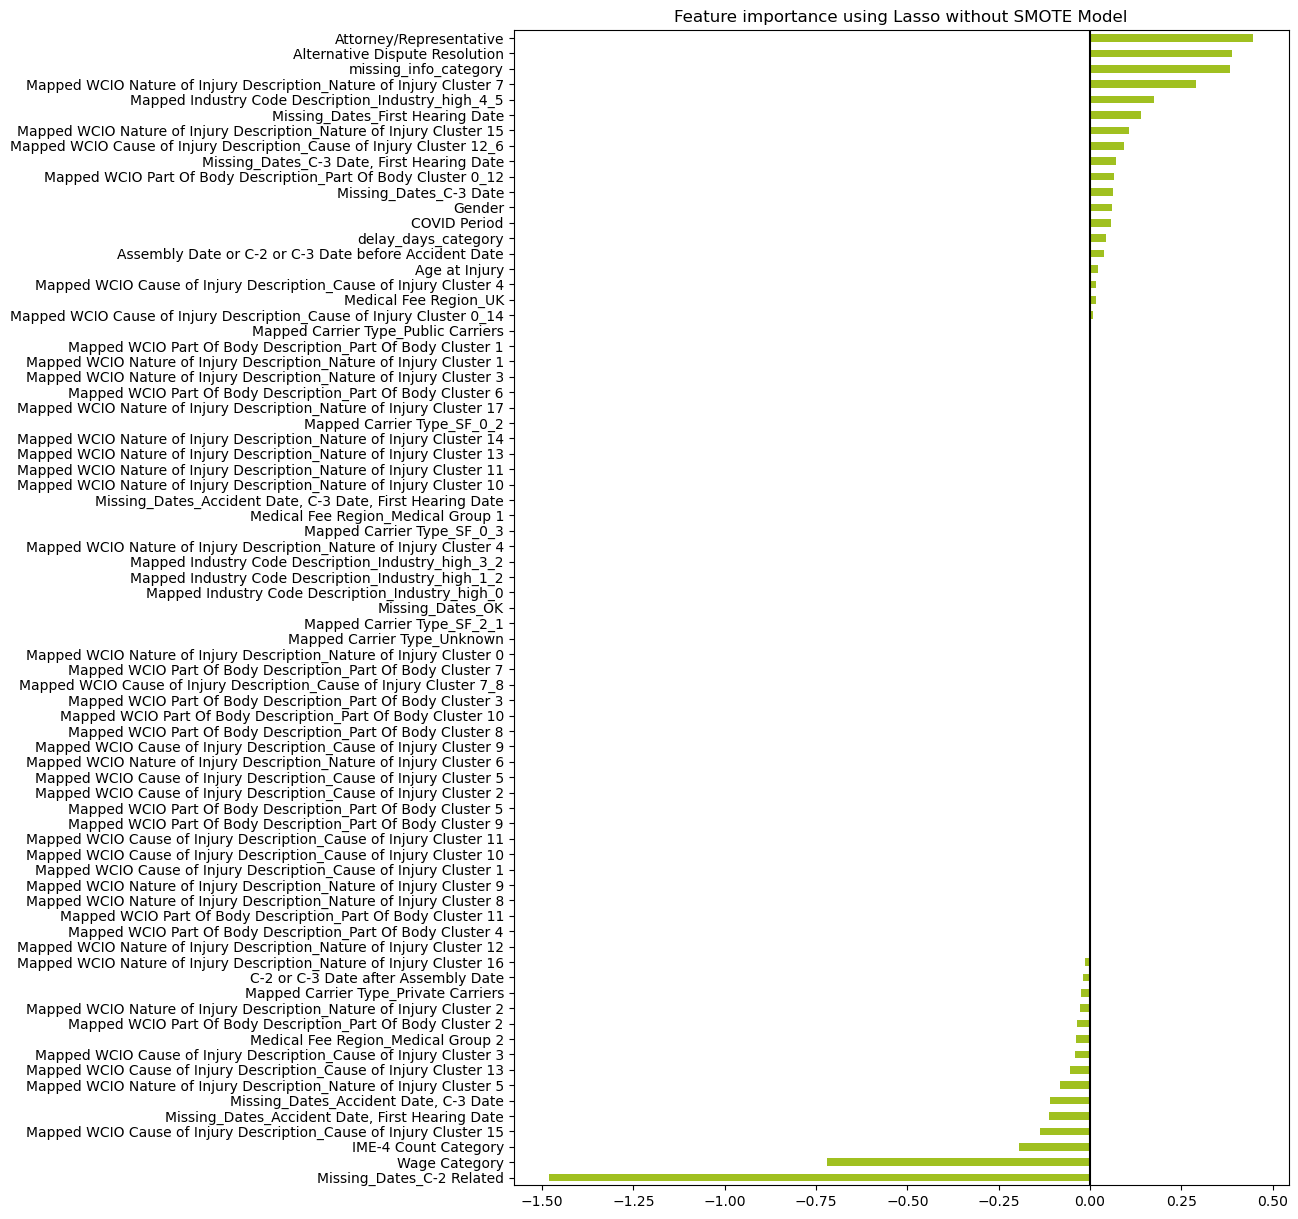

In [63]:
# Train Lasso without SMOTE
lasso_reg_no_smote = LassoCV(random_state=5)
lasso_reg_no_smote.fit(train_feature_selection, y_train_multi)
lasso_coef_no_smote = pd.Series(lasso_reg_no_smote.coef_, index=train_feature_selection.columns)

# Display results for Lasso without SMOTE
print(f"Lasso without SMOTE picked {sum(lasso_coef_no_smote != 0)} variables and eliminated {sum(lasso_coef_no_smote == 0)} variables")
plot_importance(lasso_coef_no_smote, 'Lasso without SMOTE', color='blue')

In [64]:
# Save results for Lasso without SMOTE
LASSO_no_smote_results = save_selected_features(
    'LASSO without SMOTE',
    lasso_coef_no_smote[lasso_coef_no_smote != 0].index.tolist(),
    train_feature_selection.columns.tolist()
)

#### =========================== 2. LASSO with SMOTE ===========================

In [66]:
# Apply SMOTE for handling imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_feature_selection, y_train_multi)

  File "C:\Users\catar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Lasso with SMOTE picked 50 variables and eliminated 25 variables


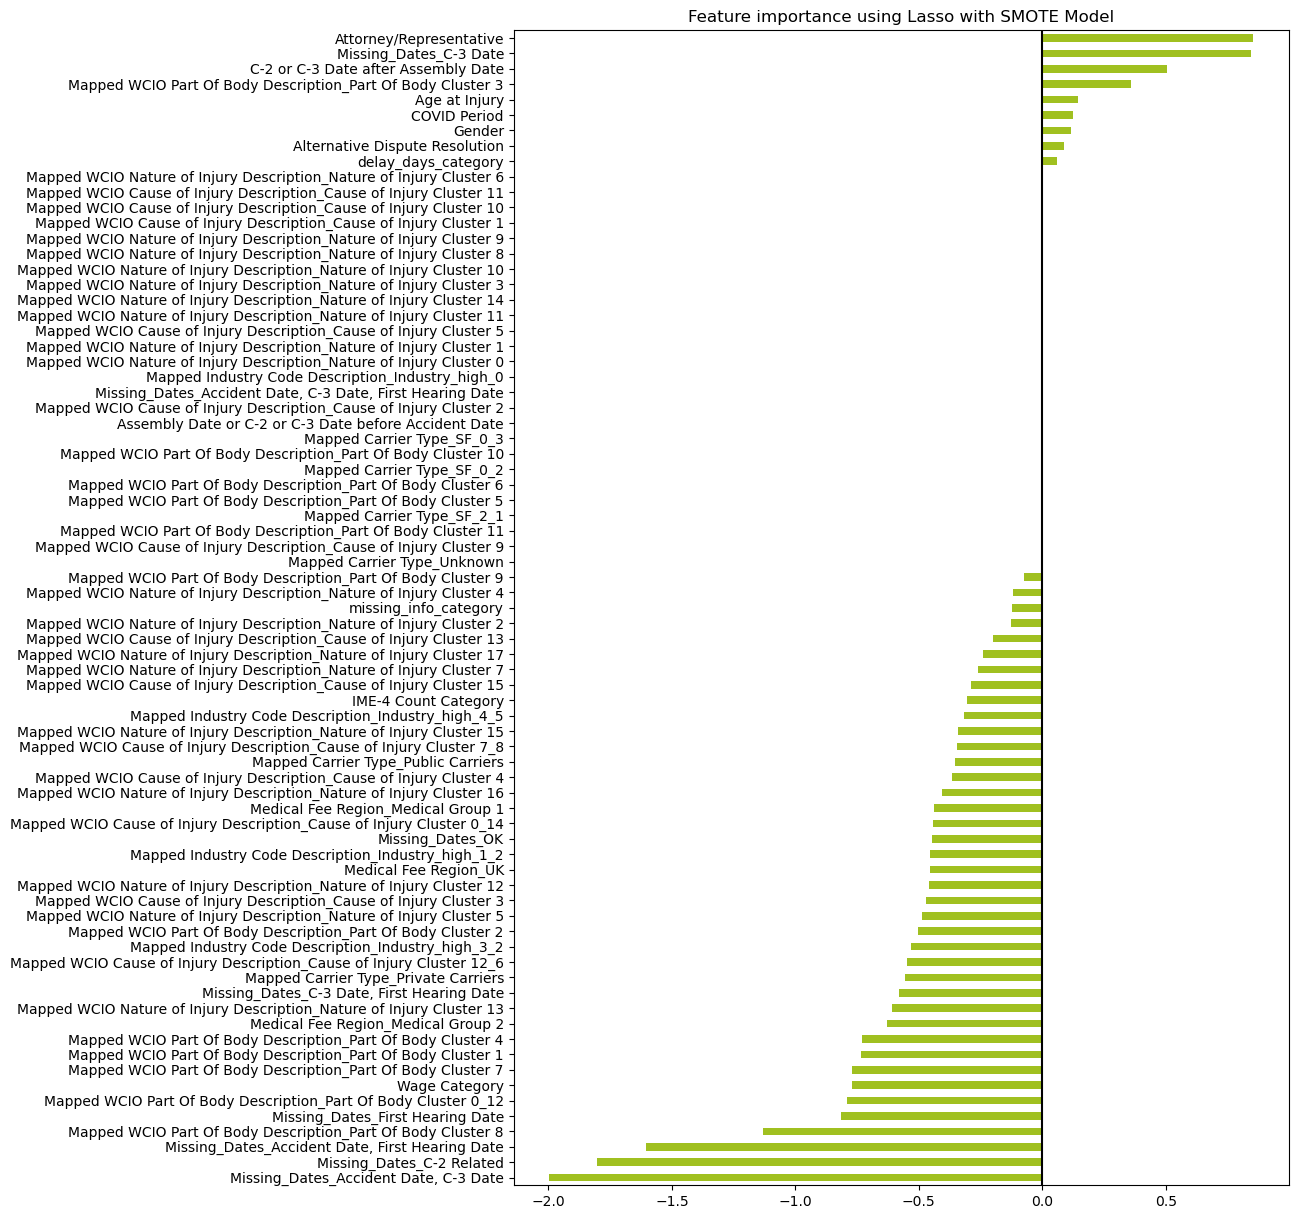

In [67]:
# Train Lasso with SMOTE
lasso_reg_smote = LassoCV(random_state=5)
lasso_reg_smote.fit(X_resampled, y_resampled)
lasso_coef_smote = pd.Series(lasso_reg_smote.coef_, index=train_feature_selection.columns)

# Display results for Lasso with SMOTE
print(f"Lasso with SMOTE picked {sum(lasso_coef_smote != 0)} variables and eliminated {sum(lasso_coef_smote == 0)} variables")
plot_importance(lasso_coef_smote, 'Lasso with SMOTE', color='orange')

In [68]:
# Save results for Lasso with SMOTE
LASSO_smote_results = save_selected_features(
    'LASSO with SMOTE',
    lasso_coef_smote[lasso_coef_smote != 0].index.tolist(),
    train_feature_selection.columns.tolist()
)

<a id = "DT"></a>
### Decision Tree

Decision trees are supervised learning algorithms that split data based on feature values to predict a target variable. During feature selection, decision trees identify the most important features by assessing how well they split the data at each node. Features that frequently appear in splits are likely more important for predicting the target.

[Back to Index](#idx)

#### ==================== 1. Standard Decision Tree ====================

In [71]:
# Decision Tree considering imbalanced classes
dt_classifier = DecisionTreeClassifier(random_state=2024, class_weight='balanced')
dt_classifier.fit(train_feature_selection, y_train_multi)

DecisionTreeClassifier(class_weight='balanced', random_state=2024)

In [72]:
# Feature importances
dt_feature_importances = pd.Series(dt_classifier.feature_importances_, index=train_feature_selection.columns)

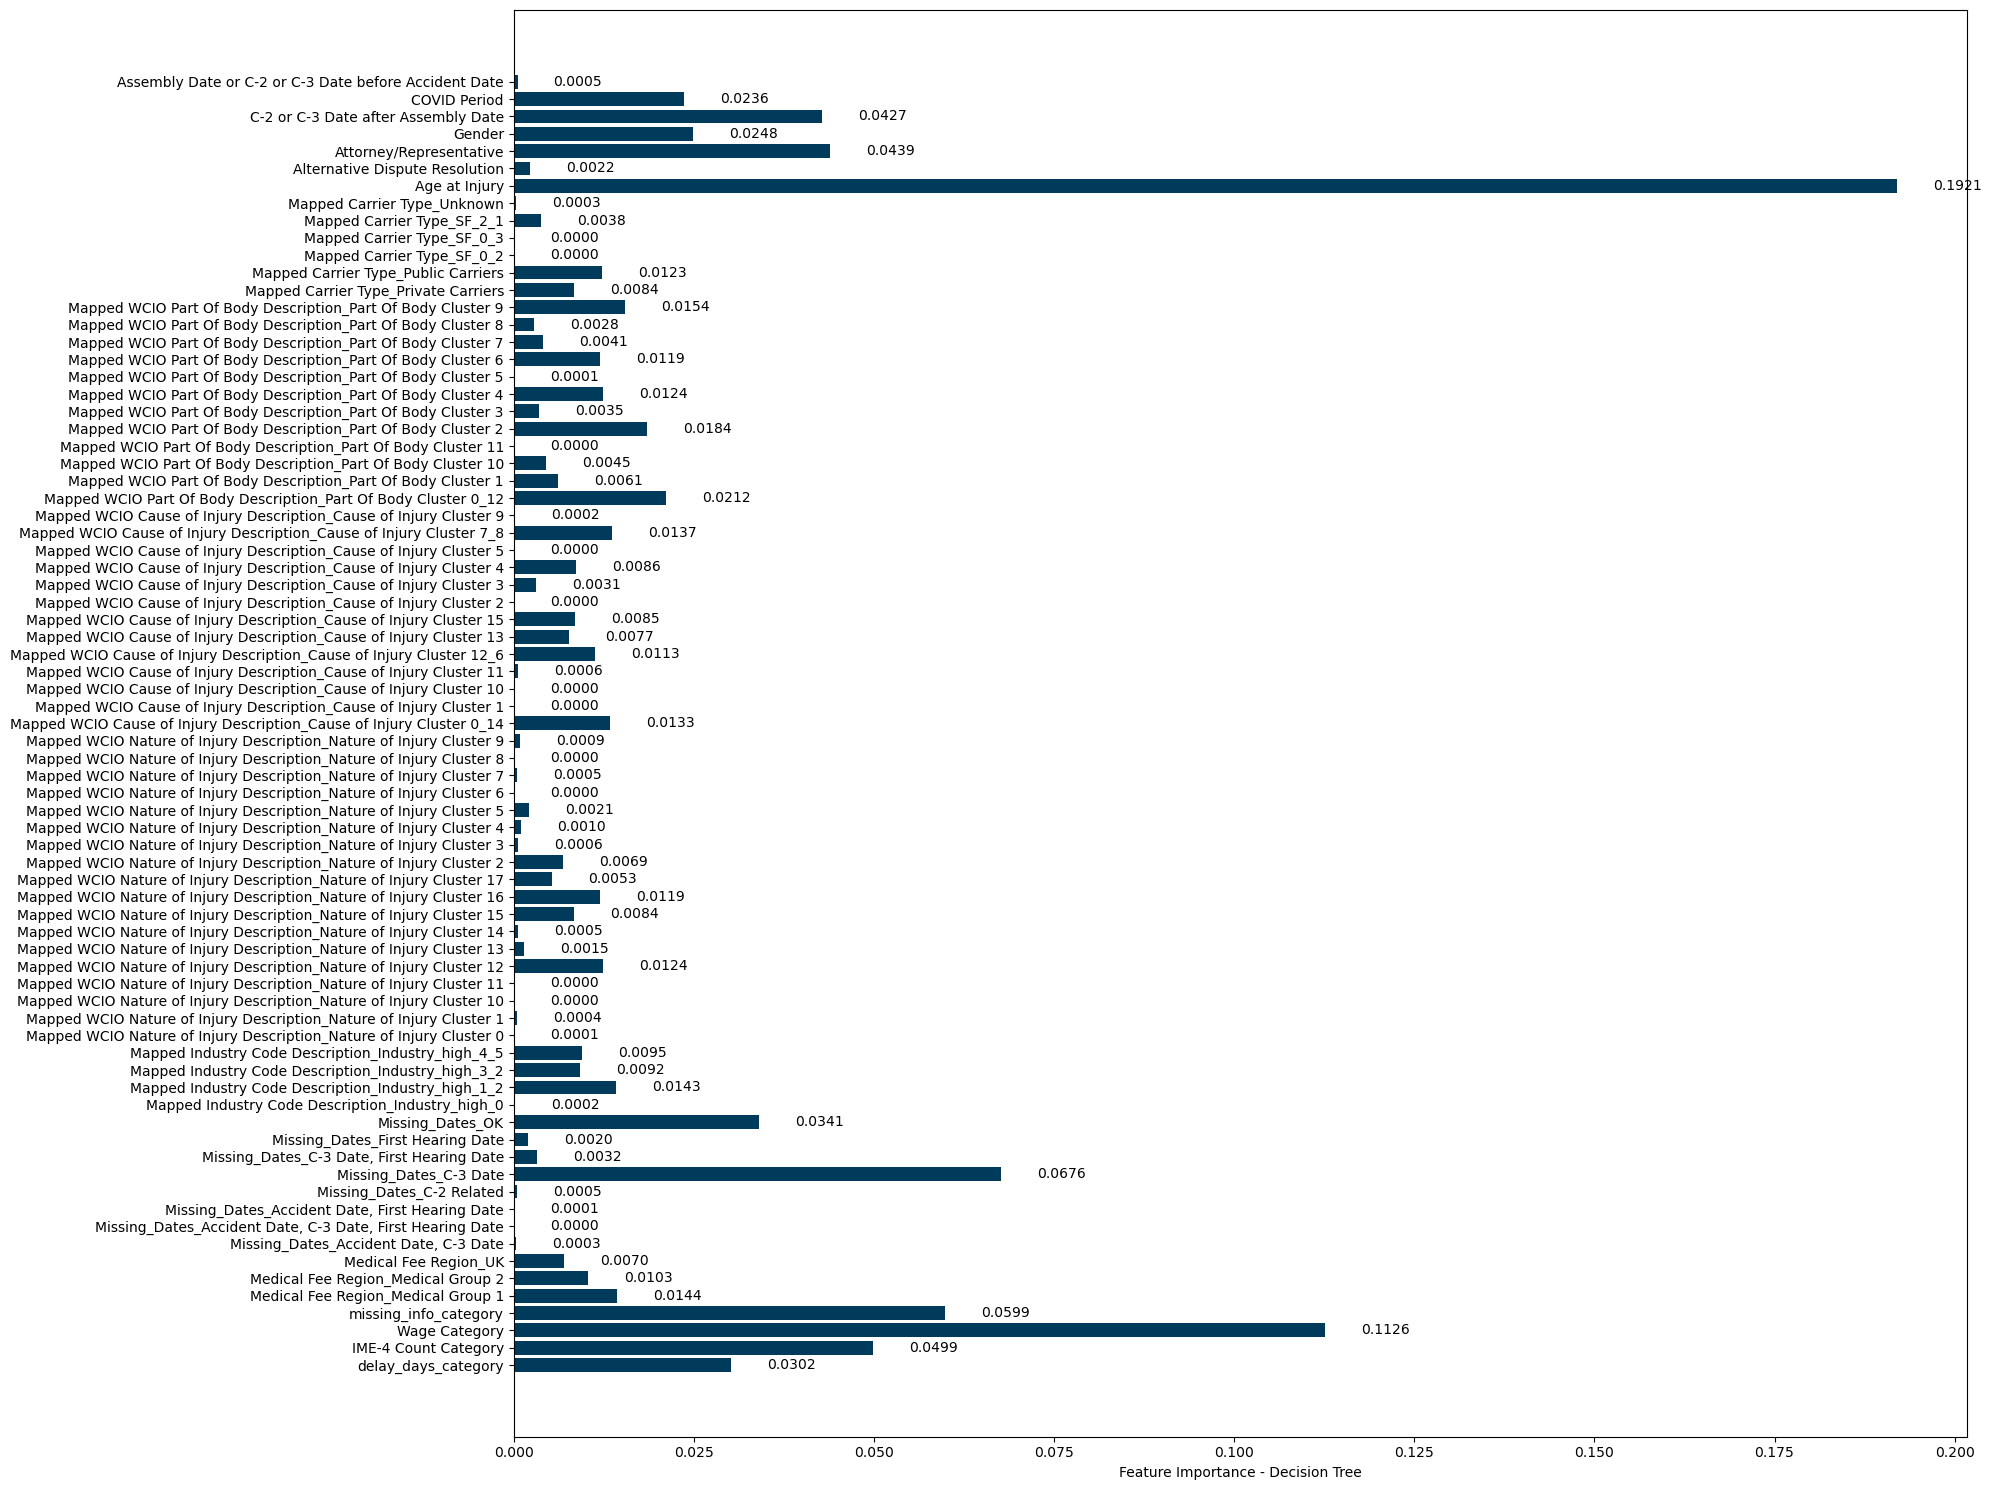

In [73]:
plt.figure(figsize=(20, 15))
bars = plt.barh(range(len(train_feature_selection.columns)), dt_classifier.feature_importances_, align='center', color=pal_novaims[1])
plt.yticks(np.arange(len(train_feature_selection.columns)), train_feature_selection.columns)

# Add the numerical values in front of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()

#### ==================== 2. Class-Based Importance ====================

In [75]:
# DataFrame to store class-based importances
class_importances = pd.DataFrame(index=train_feature_selection.columns)

# Loop through classes to calculate binary importances
for cls in unique_classes:
    binary_y = (y_train_multi == cls).astype(int)
    binary_dt = DecisionTreeClassifier(random_state=42)
    binary_dt.fit(train_feature_selection, binary_y)
    class_importances[f'Class_{cls}'] = binary_dt.feature_importances_

# Calculate weighted importances based on class distributions
class_importances['Weighted_Importance'] = class_importances.apply(
    lambda row: sum(row[f'Class_{cls}'] * class_weights[cls] for cls in unique_classes), axis=1
)

# Mean importances without weighting
class_importances['Mean_Importance'] = class_importances.iloc[:, :-1].mean(axis=1)

#### ========================  Comparison   ========================

In [77]:
comparison_df = pd.DataFrame(index=train_feature_selection.columns)
comparison_df['DT_Importance'] = dt_feature_importances
comparison_df['Weighted_Importance'] = class_importances['Weighted_Importance']
comparison_df['Mean_Importance'] = class_importances['Mean_Importance']

In [78]:
# ====================  Importance-Based Selection ====================
def select_features(importances, threshold=0.99):
    sorted_importances = importances.sort_values(ascending=False)
    cumulative = np.cumsum(sorted_importances)
    selected_features = sorted_importances[cumulative <= threshold * cumulative[-1]].index
    return selected_features

# Selection by different methods
dt_selected_features = select_features(comparison_df['DT_Importance'])
weighted_selected_features = select_features(comparison_df['Weighted_Importance'])
mean_selected_features = select_features(comparison_df['Mean_Importance'])

comparison_df['Keep_DT'] = comparison_df.index.isin(dt_selected_features)
comparison_df['Keep_Weighted'] = comparison_df.index.isin(weighted_selected_features)
comparison_df['Keep_Mean'] = comparison_df.index.isin(mean_selected_features)

In [79]:
def highlight_features(s):
    """Highlight cells in green for selected features."""
    return ['background-color: lightgreen' if v else '' for v in s]

styled_comparison_df = comparison_df.style.apply(
    highlight_features, subset=['Keep_DT', 'Keep_Weighted', 'Keep_Mean']
)

styled_comparison_df

,DT_Importance,Weighted_Importance,Mean_Importance,Keep_DT,Keep_Weighted,Keep_Mean
delay_days_category,0.030223,0.039840,0.028796,True,True,True
IME-4 Count Category,0.049923,0.007075,0.037147,True,True,True
Wage Category,0.112593,0.097428,0.184269,True,True,True
missing_info_category,0.059915,0.007645,0.043505,True,True,True
Medical Fee Region_Medical Group 1,0.014393,0.012283,0.015794,True,True,True
Medical Fee Region_Medical Group 2,0.010340,0.061774,0.021590,True,True,True
Medical Fee Region_UK,0.006952,0.010620,0.008877,True,True,True
"Missing_Dates_Accident Date, C-3 Date",0.000277,0.000005,0.000301,False,False,False
"Missing_Dates_Accident Date, C-3 Date, First Hearing Date",0.000003,0.000002,0.000053,False,False,False
"Missing_Dates_Accident Date, First Hearing Date",0.000116,0.000007,0.000260,False,False,False


In [80]:
# results for each method
dt_std_results = save_selected_features('Standard_DT', dt_selected_features, train_feature_selection.columns.tolist())
dt_weighted_results = save_selected_features('Weighted_DT', weighted_selected_features, train_feature_selection.columns.tolist())
dt_mean_results = save_selected_features('Mean_DT', mean_selected_features, train_feature_selection.columns.tolist())

<a id = "RF"></a>
### Random Forest

Random Forest is an ensemble of multiple decision trees, each trained on a random subset of data and features. It aggregates the results to improve prediction accuracy. For feature selection, Random Forest ranks features based on their importance in the ensemble. Important features contribute more to reducing the model's prediction error.

[Back to Index](#idx)

#### =========================== 1. Standard Random Forest ===========================

In [83]:
# Train a Random Forest considering imbalanced classes
rf_classifier = RandomForestClassifier(random_state=2024, class_weight='balanced')
rf_classifier.fit(train_feature_selection, y_train_multi)

# Feature importances
rf_feature_importances = pd.Series(rf_classifier.feature_importances_, index=train_feature_selection.columns)

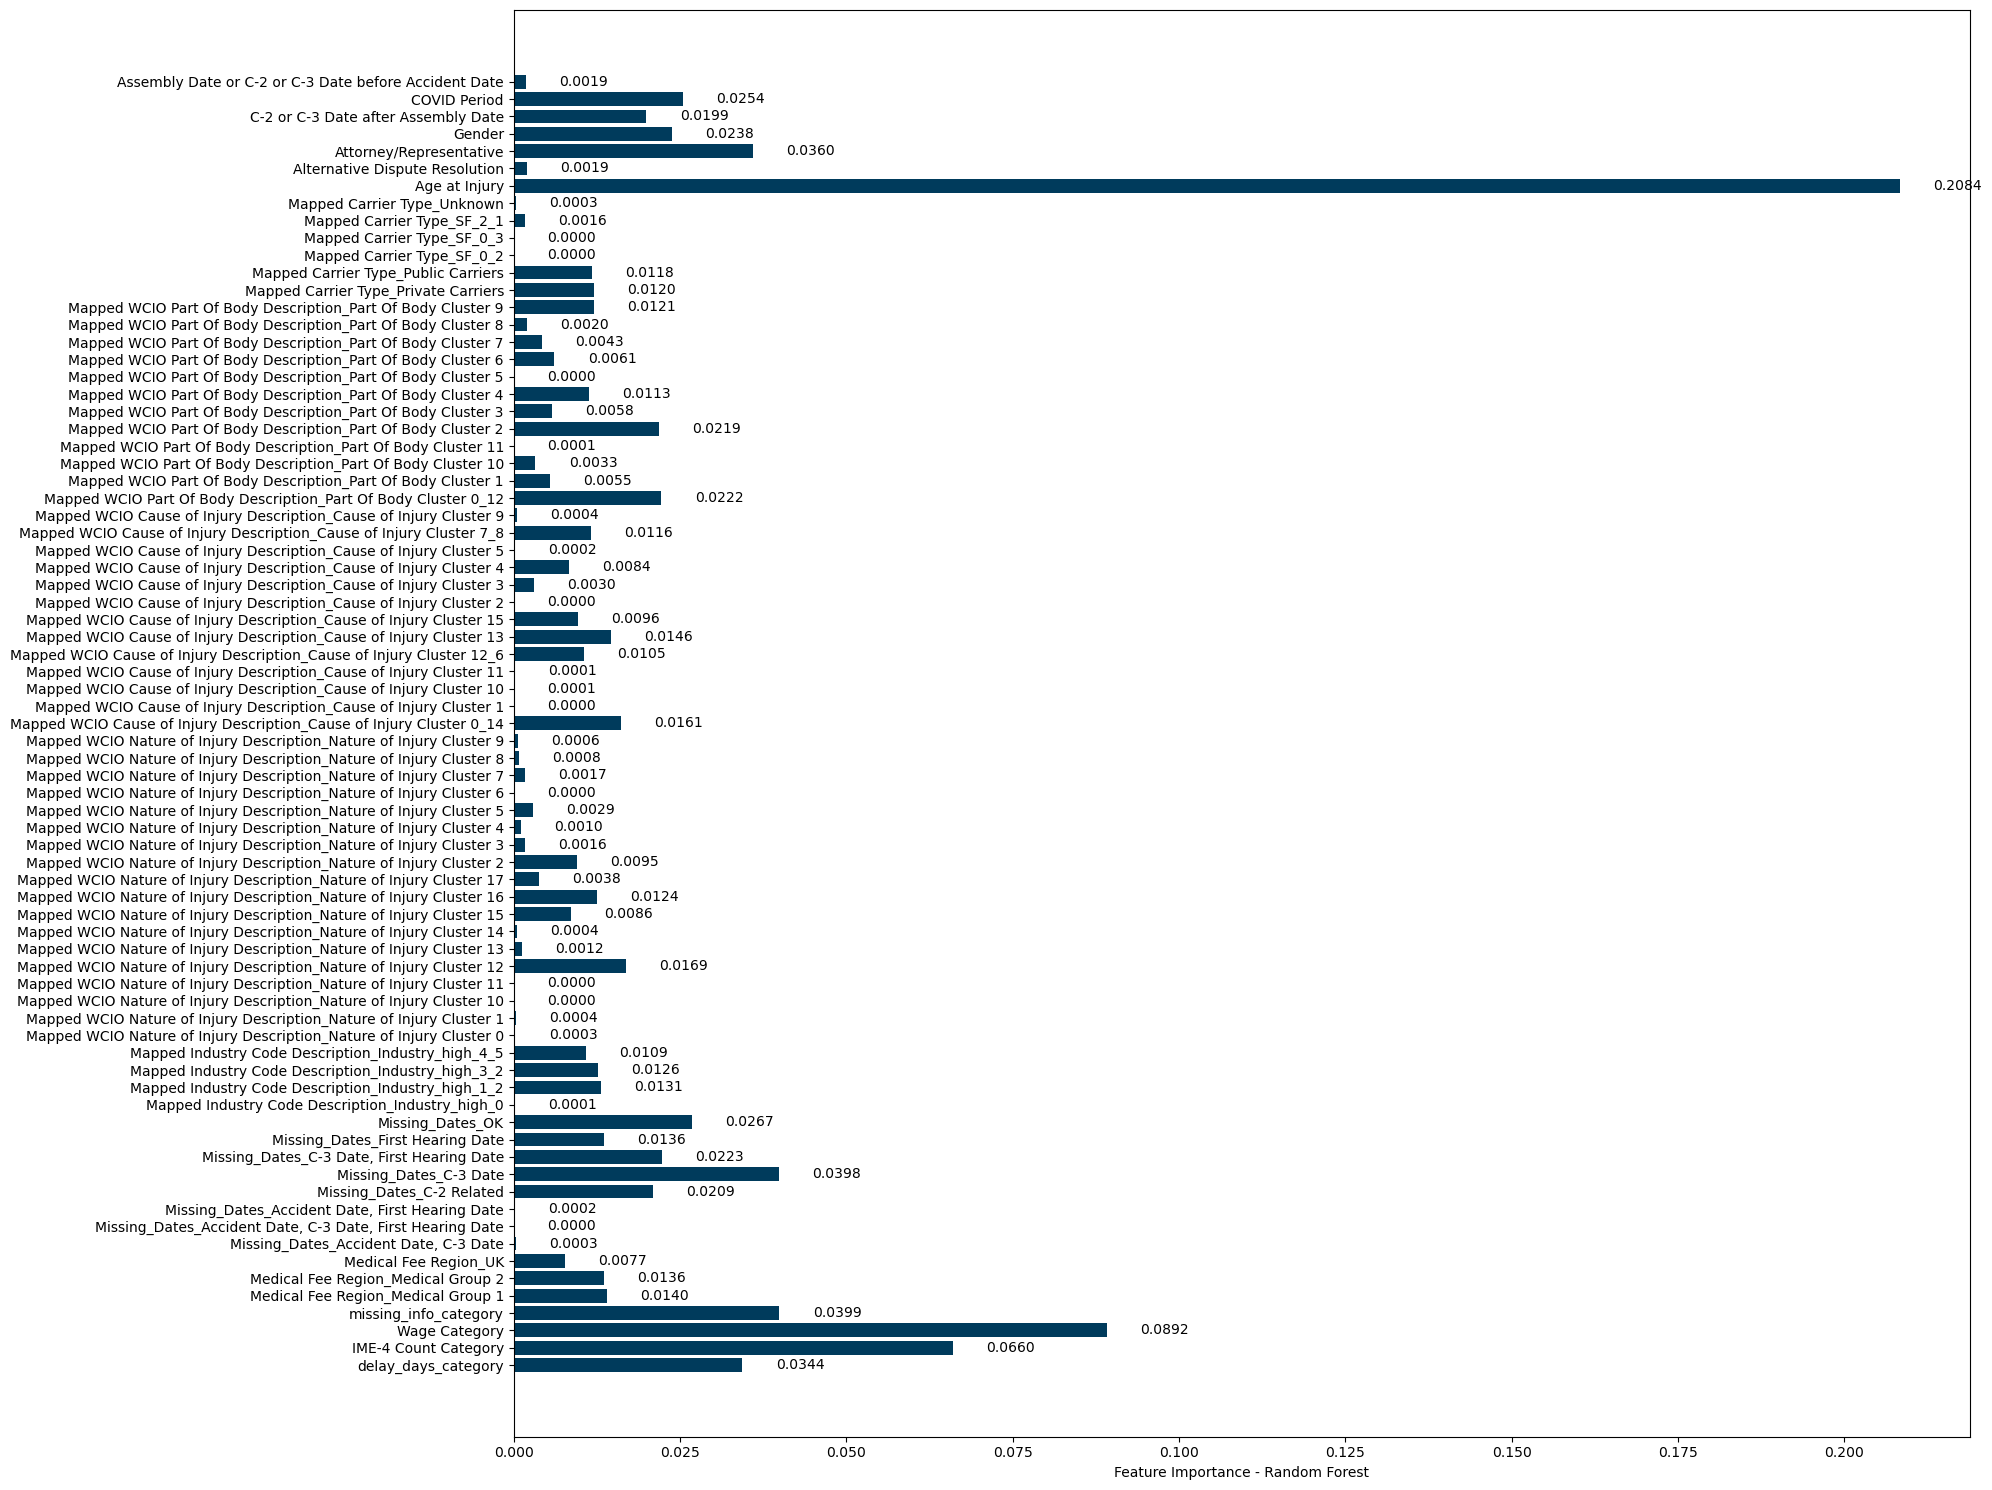

In [84]:
# Plot for the feature importances
plt.figure(figsize=(20, 15))
bars = plt.barh(range(len(train_feature_selection.columns)), rf_classifier.feature_importances_, align='center', color=pal_novaims[1])
plt.yticks(np.arange(len(train_feature_selection.columns)), train_feature_selection.columns)
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

#### ==================== 2. Class-Based Importance ====================

In [86]:
class_importances = pd.DataFrame(index=train_feature_selection.columns)

# Loop through classes to calculate binary importances (EACH CLASS)
for cls in unique_classes:
    binary_y = (y_train_multi == cls).astype(int)
    binary_rf = RandomForestClassifier(random_state=42)
    binary_rf.fit(train_feature_selection, binary_y)
    class_importances[f'Class_{cls}'] = binary_rf.feature_importances_

# 1. Calculate weighted importances based on class distributions
class_importances['Weighted_Importance'] = class_importances.apply(
    lambda row: sum(row[f'Class_{cls}'] * class_weights[cls] for cls in unique_classes), axis=1
)

# 2. Mean importances without weighting
class_importances['Mean_Importance'] = class_importances.iloc[:, :-1].mean(axis=1)

#### ==================== Comparison ====================

In [88]:
comparison_df = pd.DataFrame(index=train_feature_selection.columns)
comparison_df['RF_Importance'] = rf_feature_importances
comparison_df['Weighted_Importance'] = class_importances['Weighted_Importance']
comparison_df['Mean_Importance'] = class_importances['Mean_Importance']

In [89]:
# Selection by different methods
rf_selected_features = select_features(comparison_df['RF_Importance'])
weighted_selected_features = select_features(comparison_df['Weighted_Importance'])
mean_selected_features = select_features(comparison_df['Mean_Importance'])

comparison_df['Keep_RF'] = comparison_df.index.isin(rf_selected_features)
comparison_df['Keep_Weighted'] = comparison_df.index.isin(weighted_selected_features)
comparison_df['Keep_Mean'] = comparison_df.index.isin(mean_selected_features)

In [90]:
st_comparison_df = comparison_df.style.apply(
    highlight_features, subset=['Keep_RF', 'Keep_Weighted', 'Keep_Mean'])

st_comparison_df

,RF_Importance,Weighted_Importance,Mean_Importance,Keep_RF,Keep_Weighted,Keep_Mean
delay_days_category,0.034377,0.038510,0.033137,True,True,True
IME-4 Count Category,0.065975,0.056818,0.045416,True,True,True
Wage Category,0.089177,0.061844,0.133213,True,True,True
missing_info_category,0.039929,0.008134,0.042630,True,True,True
Medical Fee Region_Medical Group 1,0.014033,0.022296,0.013697,True,True,True
Medical Fee Region_Medical Group 2,0.013551,0.022875,0.013522,True,True,True
Medical Fee Region_UK,0.007730,0.015606,0.008621,True,True,True
"Missing_Dates_Accident Date, C-3 Date",0.000340,0.000176,0.000434,False,False,False
"Missing_Dates_Accident Date, C-3 Date, First Hearing Date",0.000021,0.000002,0.000038,False,False,False
"Missing_Dates_Accident Date, First Hearing Date",0.000233,0.000017,0.000241,False,False,False


In [91]:
# Save results for each method
rf_geral_results = save_selected_features('Standard_RF', rf_selected_features, train_feature_selection.columns.tolist())
rf_weighted_results = save_selected_features('Weighted_RF', weighted_selected_features, train_feature_selection.columns.tolist())
rf_mean_results = save_selected_features('Mean_RF', mean_selected_features, train_feature_selection.columns.tolist())

<a id = "results"></a>
### Results

[Back to Index](#idx)

In [93]:
# Combine all results into a single dataframe
results_dfs = [
    spearman_results.set_index('Feature'),
    MI_results.set_index('Feature'),
    MI_rare_results.set_index('Feature'),
    LASSO_no_smote_results.set_index('Feature'),
    LASSO_smote_results.set_index('Feature'),
    dt_std_results.set_index('Feature'),
    dt_weighted_results.set_index('Feature'),
    dt_mean_results.set_index('Feature'),
    rf_geral_results.set_index('Feature'),
    rf_weighted_results.set_index('Feature'),
    rf_mean_results.set_index('Feature')
]

feature_selection = pd.concat(results_dfs, axis=1)

In [94]:
# list of 'Keep' features for each method
spearman_keep = feature_selection[feature_selection['Spearman_Result'] == 'Keep'].index.tolist()
MI_all_Result_keep = feature_selection[feature_selection['MI_all_Result'] == 'Keep'].index.tolist() 
MI_wrare_Result_keep = feature_selection[feature_selection['MI_all_w_rare_Result'] == 'Keep'].index.tolist() 
LASSO_no_SMOTE_keep = feature_selection[feature_selection['LASSO without SMOTE_Result'] == 'Keep'].index.tolist() 
LASSO_w_SMOTE_keep = feature_selection[feature_selection['LASSO with SMOTE_Result'] == 'Keep'].index.tolist() 
Standard_DT_keep = feature_selection[feature_selection['Standard_DT_Result'] == 'Keep'].index.tolist()
Weighted_DT_keep = feature_selection[feature_selection['Weighted_DT_Result'] == 'Keep'].index.tolist() 
Mean_DT_keep = feature_selection[feature_selection['Mean_DT_Result'] == 'Keep'].index.tolist() 
Standard_RF_keep = feature_selection[feature_selection['Standard_RF_Result'] == 'Keep'].index.tolist()
Weighted_RF_keep = feature_selection[feature_selection['Weighted_RF_Result'] == 'Keep'].index.tolist() 
Mean_RF_keep = feature_selection[feature_selection['Mean_RF_Result'] == 'Keep'].index.tolist() 

In [95]:
def highlight_discarded_cells(val):
    color = 'red' if val == 'Discard' else ''  # Highlight "discard" values in red
    return f'background-color: {color}'

feature_selection = feature_selection.style.applymap(highlight_discarded_cells)

In [96]:
feature_selection

,Spearman_Result,MI_all_Result,MI_all_w_rare_Result,LASSO without SMOTE_Result,LASSO with SMOTE_Result,Standard_DT_Result,Weighted_DT_Result,Mean_DT_Result,Standard_RF_Result,Weighted_RF_Result,Mean_RF_Result
Feature,,,,,,,,,,,
delay_days_category,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep
IME-4 Count Category,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep
Wage Category,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep
missing_info_category,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep
Medical Fee Region_Medical Group 1,Keep,Discard,Discard,Discard,Keep,Keep,Keep,Keep,Keep,Keep,Keep
Medical Fee Region_Medical Group 2,Discard,Discard,Discard,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep
Medical Fee Region_UK,Keep,Discard,Discard,Keep,Keep,Keep,Keep,Keep,Keep,Keep,Keep
"Missing_Dates_Accident Date, C-3 Date",Keep,Discard,Discard,Keep,Keep,Discard,Discard,Discard,Discard,Discard,Discard
"Missing_Dates_Accident Date, C-3 Date, First Hearing Date",Keep,Discard,Discard,Discard,Discard,Discard,Discard,Discard,Discard,Discard,Discard


<a id = "modelling"></a>

<div style="background-color: #003B5C; padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">3. Modelling</h2>
</div>

[Back to Index](#idx)

In [98]:
X_small, _, y_small, _ = train_test_split(X, y_all_multi, train_size=0.8, random_state=42)

### Step 1: We are going to use Cross Validation to choose the best combination of preprocessing, features and models.

In [100]:
def evaluate_model(
    train, y_train, model, cv=5, scaler_type='Standard',
    ordinal_columns=None, one_hot_columns=None, numerical_columns=None,
    use_smote=False, feature_set_name=None, features=None, outlier_treatment=True):
    """
    Evaluates a model using stratified cross-validation on the training set.
    """
    start_time = time.perf_counter()
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Initialize results storage
    cross_val_scores = {
        "accuracy_val": [],
        "precision_val": [],
        "recall_val": [],
        "f1_macro_train": [],
        "f1_macro_val": [],
        "confusion_matrix": np.zeros((len(np.unique(y_train)), len(np.unique(y_train)))), 
    }

    scaler = scaler_type
    #after the split we assure that the train and val folds are separated amd perform the preprocessing steps to each one
    #as a reminder, the val dataset is always treated in conformity with the train dataset
    for train_indices, val_indices in skf.split(train, y_train):
        # Split into train and validation subsets
        X_train_fold, y_train_fold = train.iloc[train_indices], y_train.iloc[train_indices]
        X_val_fold, y_val_fold = train.iloc[val_indices], y_train.iloc[val_indices]

        # Fit and apply transformations within each fold
        X_train_fold, X_val_fold = preprocessing_pipeline(X_train_fold, X_val_fold, test=None, outlier_treatment=outlier_treatment)
        X_train_fold_to_scale = apply_groupings(X_train_fold)
        X_val_fold_to_scale = apply_groupings(X_val_fold)
        
        if scaler or ordinal_columns or one_hot_columns or numerical_columns:
            X_train_fold = encoder_and_scaler(
                scaler, 
                fit_data=X_train_fold_to_scale, 
                df=X_train_fold_to_scale,
                ordinal_columns=ordinal_columns,
                one_hot_columns=one_hot_columns,
                numerical_columns=numerical_columns,
            )
            X_val_fold = encoder_and_scaler(
                scaler, 
                fit_data=X_train_fold_to_scale,  # Note: Always fit on the training fold
                df=X_val_fold_to_scale,
                ordinal_columns=ordinal_columns,
                one_hot_columns=one_hot_columns,
                numerical_columns=numerical_columns,
            )
        X_train_fold = reduce_memory_usage(X_train_fold, numerical_columns)
        X_val_fold = reduce_memory_usage(X_val_fold, numerical_columns)

        # Select features
        X_train_fold = X_train_fold[features]
        X_val_fold = X_val_fold[features]

        # LightGBM compatibility: Ensure column names are consistent and strings
        X_train_fold.columns = X_train_fold.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')
        X_val_fold.columns = X_val_fold.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')
        
        # Apply SMOTE if required
        if use_smote:
            smote = SMOTE(random_state=42)
            X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predictions
        y_train_fold_pred = model.predict(X_train_fold)
        y_val_fold_pred = model.predict(X_val_fold)

        # Metrics
        cross_val_scores["accuracy_val"].append(accuracy_score(y_val_fold, y_val_fold_pred))
        cross_val_scores["precision_val"].append(precision_score(y_val_fold, y_val_fold_pred, average="macro"))
        cross_val_scores["recall_val"].append(recall_score(y_val_fold, y_val_fold_pred, average="macro"))
        cross_val_scores["f1_macro_train"].append(f1_score(y_train_fold, y_train_fold_pred, average="macro"))
        cross_val_scores["f1_macro_val"].append(f1_score(y_val_fold, y_val_fold_pred, average="macro"))
        #cross_val_scores["confusion_matrix"] += confusion_matrix(y_val_fold, y_val_fold_pred)

    # Aggregate metrics
    cross_val_metrics = {
        "cv_f1_macro_val_mean": np.mean(cross_val_scores["f1_macro_val"]),
        "cv_accuracy_val_mean": np.mean(cross_val_scores["accuracy_val"]),
        "cv_f1_macro_train_mean": np.mean(cross_val_scores["f1_macro_train"]),
        #"cv_f1_macro_train_std": np.std(cross_val_scores["f1_macro_train"]),
        #"cv_f1_macro_val_std": np.std(cross_val_scores["f1_macro_val"]),
    }

    # Overfitting calculation
    overfitting = cross_val_metrics["cv_f1_macro_train_mean"] - cross_val_metrics["cv_f1_macro_val_mean"]
    metrics = {
        **cross_val_metrics,
        "overfitting": overfitting,
        #"confusion_matrix": cross_val_scores["confusion_matrix"],
        "time": round(time.perf_counter() - start_time, 3),
    }
    print(f'cv_f1_macro_val_mean:{np.mean(cross_val_scores["f1_macro_val"])}')
    return metrics

def model_selection(
    train, y_train, feature_sets, models,
    scaler_type=["standard", "minmax"], smote_options=[True, False],
    ordinal_columns=None, one_hot_columns=None, numerical_columns=None, cv=5, outlier_treatment=True):
    """
    Model selection pipeline with support for scalers, SMOTE, and cross-validation.
    """
    ordinal_columns = ordinal_columns or []
    one_hot_columns = one_hot_columns or []
    numerical_columns = numerical_columns or []
    results = []
    iteration = 1
    total_iterations = len(scaler_type) * len(smote_options) * len(models) * len(feature_sets)

    for scaler in scaler_type:
        for model_name, model in models.items():
            print(f"\n=== Iteration {iteration}/{total_iterations} ===")
            print(f"Evaluating model: {model_name}")
            
            for use_smote in smote_options:
                print(f" Scaler: {scaler}, SMOTE: {use_smote}")
            
                # Evaluate each feature set within the model evaluation
                for feature_set_name, features in feature_sets.items():
                    print(f"  Using: {feature_set_name}")
                    metrics = evaluate_model(
                        train,
                        y_train,
                        model,
                        cv=cv,
                        scaler_type=scaler,
                        ordinal_columns=ordinal_columns,
                        one_hot_columns=one_hot_columns,
                        numerical_columns=numerical_columns,
                        use_smote=use_smote,
                        feature_set_name=feature_set_name,
                        features=features,
                        outlier_treatment=outlier_treatment
                    )

                    results.append({
                        "scaler": scaler,
                        "smote": use_smote,
                        "model": model_name,
                        "feature_set": feature_set_name,
                        **metrics
                    })

            iteration += 1

    return pd.DataFrame(results)

### Step 2: Using a fix validation set e are going to optimize hyp.

In [102]:
def optimize_hyperparameters(X, y, model, param_grid, features=None):

    # Ensure features are specified
    if features is None:
        features = X.columns.tolist()

    # Split into train/validation
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, train_size=0.7, stratify=y, shuffle=True, random_state=42)

    # Preprocess data
    train, val = preprocessing_pipeline(X_train, X_val, test=None, outlier_treatment=True)
    train_to_scale = apply_groupings(train)
    val_to_scale = apply_groupings(val)

    def encode_and_scale(data_to_fit, data, method="standard"):
        return encoder_and_scaler(
            method,
            fit_data=data_to_fit, 
            df=data,
            ordinal_columns=ordinal_columns,
            one_hot_columns=one_hot_columns,
            numerical_columns=columns_to_scale
        )

    train = encode_and_scale(train_to_scale, train_to_scale)
    val = encode_and_scale(train_to_scale, val_to_scale)

    train = reduce_memory_usage(train, columns_to_scale)
    val = reduce_memory_usage(val, columns_to_scale)

    # Select features
    train = train[features]
    val = val[features]
    
    # ---- Data leakage problem ---- FROM THE CLASSES:
    # at this moment, our data is already split into training and
    #validation data. The class GridSearchCV performs cross-validation itself and it
    #would split the data again.

    #we can circumvent this problem by passing a PredefinedSplit object to the cv
    #parameter of the GridSearchCV class. This way, we can tell GridSearch what data
    #should be used for training and what data should be used for validation.
    # Combine train and validation datasets
    print("Shape train:", train.shape)
    print("Shape y_train:", y_train.shape)
    print("Shape val:", val.shape)
    print("Shape y_val:", y_val.shape)
    print(f"train index equals y_train index: {train.index.equals(y_train.index)}")
    print(f"train index equals y_train index: {val.index.equals(y_val.index)}")

    # Predefined split to avoid data leakage
    X_combined = np.concatenate([train, val])
    y_combined = np.concatenate([y_train, y_val])
    test_fold = [-1] * len(train) + [0] * len(val)

    print(f"Test fold: {len(test_fold)}")
    print(f"X_combined: {len(X_combined)}")
    print(f"y_combined: {len(y_combined)}")

    ps = PredefinedSplit(test_fold=test_fold)

    # Calculate the total number of iterations
    total_iters = len(param_grid) * 1  # PredefinedSplit doesn't multiply the folds

    # GridSearchCV setup
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid, 
        scoring='f1_macro',
        cv=ps, 
        n_jobs=-1, 
        return_train_score=True, 
        verbose=1, 
        refit=True
    )

    # Fit with progress monitoring
    grid_search.fit(X_combined, y_combined)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Predict and calculate metrics
    y_val_pred = best_model.predict(val)

    def calculate_metrics(y_true, y_pred):
        metrics = {
            "f1_macro_val": f1_score(y_true, y_pred, average='macro'),
            "f1_weighted_val": f1_score(y_true, y_pred, average='weighted'),
            "accuracy_val": accuracy_score(y_true, y_pred),
            "precision_val": precision_score(y_true, y_pred, average='weighted'),
            "recall_val": recall_score(y_true, y_pred, average='weighted'),
        }
        f1_per_class = f1_score(y_true, y_pred, average=None)
        class_metrics = {f"f1_class_{i}": f1 for i, f1 in enumerate(f1_per_class)}
        return {**metrics, **class_metrics}

    combined_metrics = calculate_metrics(y_val, y_val_pred)
    validation_metrics_df = pd.DataFrame([combined_metrics])

    print("Best parameters found:\n", best_params)
    print("-" * 120)
    display(validation_metrics_df)

    return best_model, best_params, validation_metrics_df

In [103]:
# Models
models = {
    # Linear Models
    #'Logistic Regression': LogisticRegression(random_state=5),
    #'SVC': SVC(random_state=5, probability=True),
    
    # Tree-Based Models
    #'Decision Tree': DecisionTreeClassifier(random_state=5),
    #'Random Forest': RandomForestClassifier(random_state=5),
    #'Gradient Boosting': GradientBoostingClassifier(random_state=5),
    #'AdaBoost': AdaBoostClassifier(random_state=5),
    #'XGBoost': XGBClassifier(random_state=5),
    #'LightGBM': LGBMClassifier(random_state=5),
    #'CatBoost': CatBoostClassifier(random_state=5, verbose=0),

    # Proximity-Based Methods
    #'K Neighbors': KNeighborsClassifier(),
    
    # Bayesian Methods
    #'Gaussian Naive Bayes': GaussianNB(),
    
    # Neural Network-Based Models
    #'MLP Classifier': MLPClassifier(random_state=5, max_iter=500),
    
    # Ensemble Methods
    #'Bagging Classifier': BaggingClassifier(random_state=5),
} #note: Perform Voting and Stacking in the end 

# Feature sets
feature_sets = {
    #'all': train_feature_selection.columns.tolist(),
    #'spearman': spearman_keep,
    #'MI_all': MI_all_Result_keep,
    #'MI_w_rare': MI_wrare_Result_keep,
    #'LASSO_no_SMOTE': LASSO_no_SMOTE_keep,
    #'LASSO_w_SMOTE': LASSO_w_SMOTE_keep,
    #'Standard_DT': Standard_DT_keep,
    #'Weighted_DT': Weighted_DT_keep,
    #'Mean_DT': Mean_DT_keep,
    #'Standard_RF': Standard_RF_keep,
    #'Weighted_RF': Weighted_RF_keep,
    #'Mean_RF': Mean_RF_keep
}

For hyperparameter tuning, we selected the models highlighted in green. Logistic Regression was chosen strategically due to its moderate performance and low overfitting tendency. This characteristic makes it valuable in ensemble methods (such as voting and stacking), as it helps reduce the overall overfitting of the combined models.
The other models were selected based on their macro F1 score performance on the validation set, with one exception: Gaussian Naïve Bayes. This model was included despite its lower performance because we wanted to evaluate how much its contribution could improve the ensemble's performance. The CatBoost and SVC were excluded because they take too long to run.


### Base results (Step 1 results):
in this step we are going to analyze the top performer feature set and the 4 Top performer models to then optimize hyperparameters.

In [105]:
#base_models.sort_values(by=['cv_f1_macro_val_mean', 'overfitting'], ascending=[False, True], inplace=True)
#base_models

#### Choosen features:

In [108]:
features = spearman_keep

### Logistic regression

In [110]:
lr = LogisticRegression(random_state = 5, max_iter=1000)

In [111]:
lr_parameters = {
    'penalty': ['l1', 'l2'],             
    'C': [0.1, 1, 10],                  
    'class_weight': [None, 'balanced'], 
    'solver': ['lbfgs', 'saga'],    
    'multi_class': ['ovr', 'multinomial']}

In [112]:
#optimize_hyperparameters(X_small, y_small, lr, lr_parameters, features = features)

### Random Forest

In [114]:
rf = RandomForestClassifier(bootstrap =True, random_state=5)

In [115]:
rf_parameters = {
    'n_estimators': [100, 200],  # Reduced number of trees
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  # Allow splitting with fewer samples
    'min_samples_leaf': [1, 2],  # Prevent too deep trees
    'class_weight': ['balanced', None]}

In [116]:
#optimize_hyperparameters(X_small, y_small, rf, rf_parameters, features = features)

The random forest did increse the f1 score a lot with the hyperparameter tunnnig, but we know that this is prone to overfitting so we need to confirm firsa and then combine it with other models.
Note: RF seems to be good to predict minority classes.

### Gradient Boosting

In [119]:
gb = GradientBoostingClassifier(random_state=5)

In [120]:
gb_parameters = {
    'learning_rate': [0.05, 0.1], 
    'n_estimators': [100, 200],  
    'max_depth': [3, 5],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 3], 
    'subsample': [0.8], 
    'max_features': ['sqrt'] }

In [121]:
#optimize_hyperparameters(X_small, y_small, gb, gb_parameters, features = features)

### XGBoost

In [123]:
xgb = XGBClassifier(num_class = 8, objective= 'multi:softmax', random_state=5)

In [124]:
xgb_parameters = {
    'learning_rate': [0.05, 0.1],  
    'n_estimators': [200, 300],  
    'max_depth': [3, 5],  
    'min_child_weight': [1], 
    'gamma': [0],  
    'subsample': [0.8],  
    'colsample_bytree': [0.7]}

In [125]:
#optimize_hyperparameters(X_small, y_small, xgb, xgb_parameters, features = features)

Best parameters found:
 {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'num_class': 8, 'objective': 'multi:softmax', 'subsample': 0.8}

### Gaussian naive bayes

In [128]:
gnb = GaussianNB()

In [129]:
gnb_parameters = {
    'var_smoothing': [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 1e-6, 1e-7]}

In [130]:
#optimize_hyperparameters(X_small, y_small, gnb, gnb_parameters, features = features)

### LightGBM

In [132]:
lgbm = LGBMClassifier(
    bagging_freq=5, 
    random_state=5)

In [133]:
lgbm_parameters = {
    'num_leaves': [15, 31],             
    'max_depth': [3, 7],                
    'learning_rate': [0.01, 0.05],      
    'min_data_in_leaf': [50, 100],    
    'feature_fraction': [0.7, 0.8],     
    'bagging_fraction': [0.7, 0.8], 
    'lambda_l2': [1.0, 5.0],            
    'n_estimators': [200, 500]
}

In [134]:
#optimize_hyperparameters(X_small, y_small, lgbm, lgbm_parameters, features = features)

### Neural Networks


In [136]:
nn = MLPClassifier(random_state=5, max_iter=500)

In [137]:
nn_parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)], 
    'activation': ['relu', 'tanh'],  
    'learning_rate_init': [0.001, 0.01],
    'solver': ['adam', 'sgd'],  
    'batch_size': [500, 1000]  
}

In [138]:
#optimize_hyperparameters(X_small, y_small, nn, nn_parameters, features = features)

Best parameters found: {'activation': 'relu', 'batch_size': 500, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'adam'} - unfortnally we dont have a computer that can handle a base model as nn = MLPClassifier(random_state=5, max_iter=1000 or 2000, tol=1e-5 to test other options during this tunning. but we manage to improve the score a bit from 0.42 to 0.49.

### Optimal Models before ensemble:

| Model               | Parameters                                                                                                     |
|---------------------|---------------------------------------------------------------------------------------------------------------|
| Logistic Regression | {'C': 10, 'class_weight': None, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}              |
| Random Forest       | {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} |
| Gradient Boosting   | {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8} |
| XGBoost             | {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'num_class': 8, 'objective': 'multi:softmax', 'subsample': 0.8} |
| Gaussian Naive Bayes| {'var_smoothing': 0.1}                                                                                        |
| LightGBM            | {'bagging_fraction': 0.8, 'feature_fraction': 0.7, 'lambda_l2': 5.0, 'learning_rate': 0.05, 'max_depth': 7, 'min_data_in_leaf': 100, 'n_estimators': 500, 'num_leaves': 31} |
| MLP Classifier      | {'activation': 'relu', 'batch_size': 500, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'adam'} |






| Model               | F1 Macro Val | F1 Weighted Val | F1 Class 0 | F1 Class 1 | F1 Class 2 | F1 Class 3 | F1 Class 4 | F1 Class 5 | F1 Class 6 | F1 Class 7 |
|---------------------|--------------|-----------------|------------|------------|------------|------------|------------|------------|------------|------------|
| Random Forest       | 0.669272     | 0.792241        | 0.651688   | 0.910773   | 0.428439   | 0.778668   | 0.721403   | 0.282628   | 0.847458   | 0.733119   |
| LightGBM            | 0.529335     | 0.744523        | 0.569996   | 0.90886    | 0.122357   | 0.7895     | 0.61493    | 0.00782    | 0.387097   | 0.834123   |
| Gradient Boosting   | 0.507902     | 0.735076        | 0.573175   | 0.906381   | 0.086485   | 0.783041   | 0.589024   | 0.009766   | 0.424242   | 0.691099   |
| MLP Classifier      | 0.488039     | 0.738982        | 0.541793   | 0.906403   | 0.109248   | 0.783244   | 0.611091   | 0.005865   | 0.266667   | 0.68       |
| XGBoost             | 0.427999     | 0.782222        | 0.552371   | 0.900283   | 0.076294   | 0.770511   | 0.562041   | 0.004551   | 0.409091   | 0.673415   |
| Logistic Regression | 0.404431     | 0.719937        | 0.516902   | 0.901024   | 0.092029   | 0.758577   | 0.527456   | 0.001961   | 0.0        | 0.4375     |
| Gaussian Naive Bayes| 0.345794     | 0.622279        | 0.454831   | 0.872949   | 0.156388   | 0.412148   | 0.517588   | 0.119807   | 0.064171   | 0.168472   |


We did manage to improve the GNB performance, but it's not enough. Although it performed well, we will leave the gradient boosting behind due to the time it needs to compute.

In [143]:
# Models
optimal_models = {
    "LogisticRegression": LogisticRegression(random_state=5,class_weight=None,multi_class="multinomial",penalty="l1",solver="saga"),
    "RandomForestClassifier": RandomForestClassifier(bootstrap=True,random_state=5,class_weight="balanced",max_depth=20,min_samples_leaf=1,min_samples_split=5,n_estimators=100),
    "LGBMClassifier": LGBMClassifier(bagging_freq=5,random_state=5,bagging_fraction=0.8,feature_fraction=0.7,lambda_l2=5.0,learning_rate=0.05,max_depth=7,min_data_in_leaf=100,n_estimators=500,num_leaves=31),
    'XGBoost': XGBClassifier(colsample_bytree=0.5,gamma=0,learning_rate=0.05,max_depth=5,min_child_weight=1,n_estimators=300,num_class=8,objective='multi:softmax',subsample=0.8,random_state=5),
    "MLPClassifier": MLPClassifier(random_state=5,max_iter=1000,activation="relu",batch_size=500,hidden_layer_sizes=(100,),learning_rate_init=0.01,solver="adam", tol=1e-5)
} #note: Perform Voting and Stacking in the end 

optimal_features = {
    'spearman': spearman_keep}

| Scaler    | SMOTE | Model                  | Feature Set | CV F1 Macro Val Mean | CV Accuracy Val Mean | CV F1 Macro Train Mean | Overfitting | Time (s)  |
|-----------|-------|------------------------|-------------|-----------------------|-----------------------|------------------------|-------------|-----------|
| standard  | False | RandomForestClassifier | spearman    | 0.439412             | 0.723143             | 0.668681              | 0.229269    | 1194.852  |
| standard  | False | LGBMClassifier         | spearman    | 0.432287             | 0.784186             | 0.515715              | 0.083429    | 987.500   |
| standard  | False | XGBoost                | spearman    | 0.427999             | 0.782222             | 0.452419              | 0.024421    | 992.555   |
| standard  | False | MLPClassifier          | spearman    | 0.423735             | 0.780674             | 0.467701              | 0.043966    | 1508.334  |
| standard  | False | LogisticRegression     | spearman    | 0.398893             | 0.764478             | 0.402228              | 0.003336    | 2315.928  |


1. **Cross-Validation vs. Training Scores:**
   - Cross-validation provides a more accurate assessment of the F1 score compared to training scores.
   - Training scores are consistent with those observed during the tuning process.
   - Validation scores, however, are more representative of the expected performance on Kaggle submissions, particularly for the **Random Forest model**.

2. **Logistic Regression Model:**
   - Experimented with **C = 10**, which significantly increased runtime to **15,000 seconds**.
   - After analysis, we removed the **C = 10** setting, reducing runtime to acceptable levels.


3. Min-Max Scaler: Using the **Min-Max Scaler** nearly tripled computational time in some cases. This could be attributed to the fact that scaling each feature to a specific range (e.g., 0 to 1) requires more calculations, especially for large datasets like ours. 


4. SMOTE and Overfitting: We notice that applying **SMOTE** genrally increases overfitting maybe due to the creation of synthetic data for underrepresented target classes - the synthetic samples are created by interpolating existing minority class samples, which may amplify noise or less meaningful patterns in the data, making the model less generalizable.

5. **Model-Specific Observations:**
   - Random Forest: Performs well for smaller categories due to its ability to handle imbalanced datasets and capture complex interactions. However, it shows overfitting because it tends to memorize patterns in the minority classes, which may not generalize well to unseen data.
   - XGBoost vs. LGBMClassifier: Both models exhibit similar performance across metrics. **LGBMClassifier** performs slightly better overall but has marginally higher overfitting compared to XGBoost.  
   - Logistic Regression: Chosen to help reduce overfitting when combined with other models.

6. **Ensemble Strategy:**
   - To balance performance and overfitting, we plan to combine the strengths of:
     - **Random Forest:** Strong performance on smaller categories.
     - **LGBMClassifier:** Slightly better metrics than XGBoost, despite marginally higher overfitting.
     - **Logistic Regression:** Helps mitigate overfitting in the ensemble.

## Ensemble best models

In [147]:
features = spearman_keep

In [148]:
# Preprocess data for modeling
train_modelling, val_modelling, test_modelling = preprocessing_pipeline(X_train, val = X_val, test=test, outlier_treatment=True)
train_modelling_scale = apply_groupings(train_modelling)
val_modelling_to_scale = apply_groupings(val_modelling)
test_modelling_to_scale = apply_groupings(test_modelling)

def encode_and_scale(data_to_fit, data, method="standard"):
    return encoder_and_scaler(
        method,
        fit_data=data_to_fit, 
        df=data,
        ordinal_columns=ordinal_columns,
        one_hot_columns=one_hot_columns,
        numerical_columns=columns_to_scale)

train_modelling = encode_and_scale(train_modelling_scale, train_modelling_scale)
val_modelling = encode_and_scale(train_modelling_scale, val_modelling_to_scale)
test_modelling = encode_and_scale(train_modelling_scale, test_modelling_to_scale)

train_modelling = reduce_memory_usage(train_modelling, columns_to_scale)
val_modelling = reduce_memory_usage(val_modelling, columns_to_scale)
test_modelling = reduce_memory_usage(test_modelling, columns_to_scale)

Bounds for Age at Injury: Lower = -3.5, Upper = 88.5
Memory usage of dataframe is 229.92 MB
Memory usage after optimization is: 119.56 MB
Decreased by 48.0%
Memory usage of dataframe is 98.54 MB
Memory usage after optimization is: 51.24 MB
Decreased by 48.0%
Memory usage of dataframe is 222.00 MB
Memory usage after optimization is: 115.44 MB
Decreased by 48.0%


The LGBM needs to have the column names normalized:

In [150]:
def normalize_column_names(df):
    df.columns = df.columns.str.replace(r'[^\w]', '_', regex=True)
    return df

train_modelling = train_modelling[features]
val_modelling = val_modelling[features]
test_modelling = test_modelling[features]

# Aplicar nos dados
train_modelling = normalize_column_names(train_modelling)
val_modelling = normalize_column_names(val_modelling)
test_modelling = normalize_column_names(test_modelling)

In [151]:
# Models 
log_reg = LogisticRegression(random_state=5,class_weight=None,multi_class="multinomial",penalty="l1",solver="saga")
random_forest = RandomForestClassifier(bootstrap=True,random_state=5,class_weight="balanced",max_depth=20,min_samples_leaf=1,min_samples_split=5,n_estimators=100)
lgbm = LGBMClassifier(bagging_freq=5,random_state=5,bagging_fraction=0.8,feature_fraction=0.7,lambda_l2=5.0,learning_rate=0.05,max_depth=7,min_data_in_leaf=100,n_estimators=500,num_leaves=31)

### Voting Classifier

The Voting Classifier combines predictions from multiple models through majority voting or averaged probabilities. The following models will be included based on their performance:

- **Random Forest:** Strong performance on smaller categories.
- **LGBMClassifier:** Slightly better metrics than XGBoost, despite marginally higher overfitting.
- **Logistic Regression:** Helps mitigate overfitting in the ensemble.

In [153]:
models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', random_forest),
    ('LGBM', lgbm)
]

# combinations of models
base_models = [model for model in models]
combinations_list = []
for r in range(2, len(base_models) + 1):  # Start from r = 2
    combinations_list.extend(combinations(base_models, r))

# Convert combinations to a list of lists
final_combinations = [list(comb) for comb in combinations_list]

# Print final combinations
print("Final Combinations (excluding single-model combinations):")
for comb in final_combinations:
    print([name for name, _ in comb])

Final Combinations (excluding single-model combinations):
['Logistic Regression', 'Random Forest']
['Logistic Regression', 'LGBM']
['Random Forest', 'LGBM']
['Logistic Regression', 'Random Forest', 'LGBM']


#### Best voting model:

Best Combination: ['Random Forest', 'LGBM']

Best Weights: (2, 1)


Best Macro Avg F1-Score: 0.4548887750728692

In [156]:
voting = VotingClassifier(
    estimators=[
        ('Random Forest', random_forest),
        ('LGBM', lgbm)],
    voting='soft', 
    weights=[2, 1])

In [157]:
voting.fit(train_modelling, y_train_multi)

y_pred_voting = voting.predict(val_modelling)
y_prob_voting = voting.predict_proba(val_modelling)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.62      0.57      3743
           1       0.86      0.95      0.90     87324
           2       0.40      0.11      0.18     20672
           3       0.74      0.78      0.76     44552
           4       0.59      0.65      0.62     14484
           5       0.10      0.17      0.13      1263
           6       0.00      0.00      0.00        29
           7       0.51      0.45      0.48       141

    accuracy                           0.77    172208
   macro avg       0.47      0.47      0.45    172208
weighted avg       0.74      0.77      0.74    172208



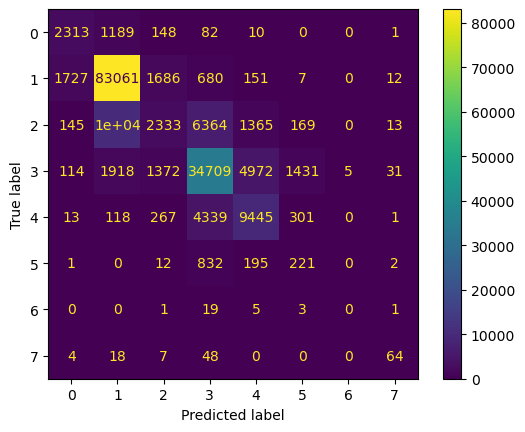

In [158]:
print("\nClassification Report:\n", classification_report(y_val_multi, y_pred_voting))
voting_cm = confusion_matrix(y_val_multi, y_pred_voting)
ConfusionMatrixDisplay(voting_cm).plot()

### Stacking Classifier
The Stacking Classifier trains a meta-model on predictions from base models. For the best results:

- Base Models: Random Forest and LGBM
- Meta-Model: Logistic Regression as the final estimator because it is simple and effective in learning combinations of predictions.

In [160]:
estimators=[
        ('Random Forest', random_forest),
        ('LGBM', lgbm)]

In [161]:
stacking = StackingClassifier(estimators = estimators,final_estimator=log_reg)

In [162]:
stacking.fit(train_modelling, y_train_multi)
y_pred = stacking.predict(val_modelling)
print("\nClassification Report:\n", classification_report(y_val_multi, y_pred))

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be

### Two-stage ensemble learning
First, a meta-classifier (voting) is used to predict whether each claim should be handled by RF or LGBM. Based on the meta-classifier's predictions, it assigns each sample to either RF or LGBM, and the corresponding model makes predictions. The predictions from both models are then combined into a single column.

In [164]:
# Define target groups
rf_targets = [0, 2, 4, 5, 6]
lgbm_targets = [1, 3, 7]

# Ensure target groups are mutually exclusive and exhaustive
assert set(rf_targets).isdisjoint(lgbm_targets), "Target groups must not overlap"
assert set(rf_targets + lgbm_targets) == set(np.unique(y_train_multi)), "All targets must be covered"

# Create meta labels for model assignment
meta_labels = np.array([0 if target in rf_targets else 1 for target in y_train_multi])

# Train meta-classifier
meta_classifier = voting
meta_classifier.fit(train_modelling, y_train_multi)

# Filter training data for each model
rf_indices = np.isin(y_train_multi, rf_targets)
lgbm_indices = np.isin(y_train_multi, lgbm_targets)

# Subset data
X_rf, y_rf = train_modelling[rf_indices], y_train_multi[rf_indices]
X_lgbm, y_lgbm = train_modelling[lgbm_indices], y_train_multi[lgbm_indices]

# Train individual models
rf = random_forest
rf.fit(X_rf, y_rf)

lgbm.fit(X_lgbm, y_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.7,
               lambda_l2=5.0, learning_rate=0.05, max_depth=7,
               min_data_in_leaf=100, n_estimators=500, random_state=5)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be

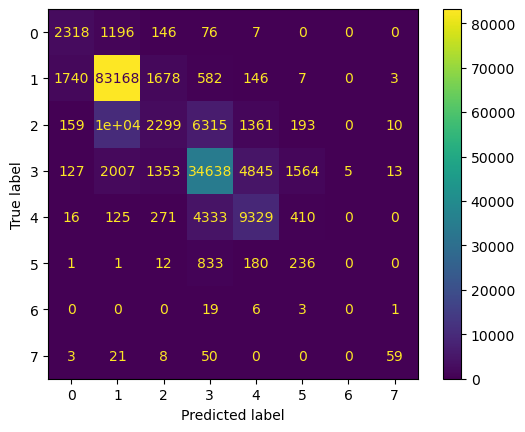

In [165]:
# Predictions on validation set using meta-classifier
meta_val_preds = meta_classifier.predict(val_modelling)

rf_val_indices = np.isin(meta_val_preds, rf_targets)
lgbm_val_indices = np.isin(meta_val_preds, lgbm_targets)

# Handle empty subsets
rf_preds = []
lgbm_preds = []

if np.any(rf_val_indices):
    rf_preds = rf.predict(val_modelling[rf_val_indices])
else:
    print("No validation samples assigned to RF.")

if np.any(lgbm_val_indices):
    lgbm_preds = lgbm.predict(val_modelling[lgbm_val_indices])
else:
    print("No validation samples assigned to LGBM.")

# Combine predictions
combined_preds = np.full(y_val_multi.shape, -1)  # Placeholder for predictions
if np.any(rf_val_indices):
    combined_preds[rf_val_indices] = rf_preds
if np.any(lgbm_val_indices):
    combined_preds[lgbm_val_indices] = lgbm_preds

# Ensure all predictions are assigned
assert np.all(combined_preds != -1), "Some validation targets were not assigned"

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_val_multi, combined_preds))
comb_cm = confusion_matrix(y_val_multi, combined_preds)
ConfusionMatrixDisplay(comb_cm).plot()

### Final Result Evaluation
We will use the Voting Classifier as our final model since it is simpler to evaluate. we need to ensure we also consider other metrics such as...
- ROC Curve and AUC & Precision-Recall Curve
- Precision-Recall Curve

#### ROC Curve and AUC & Precision-Recall Curve

In [168]:
def analyze_model_performance(y_true, y_pred, y_prob, class_labels=None):
    # Ensure class labels are provided
    if class_labels is None:
        class_labels = np.unique(y_true)

    # Binarize the true labels for multiclass ROC/AUC computation
    y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
    n_classes = len(class_labels)

    # Validate dimensions of y_prob
    if y_prob.shape[1] != n_classes:
        raise ValueError("Mismatch between number of classes in y_prob and class_labels")
    
    # Set up the plot
    plt.figure(figsize=(14, 6))

    # ROC Curve and AUC for each class
    plt.subplot(1, 2, 1)
    for i, class_label in enumerate(class_labels):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)

    # Precision-Recall Curve for each class
    plt.subplot(1, 2, 2)
    for i, class_label in enumerate(class_labels):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_prob[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {class_label}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc='lower left')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

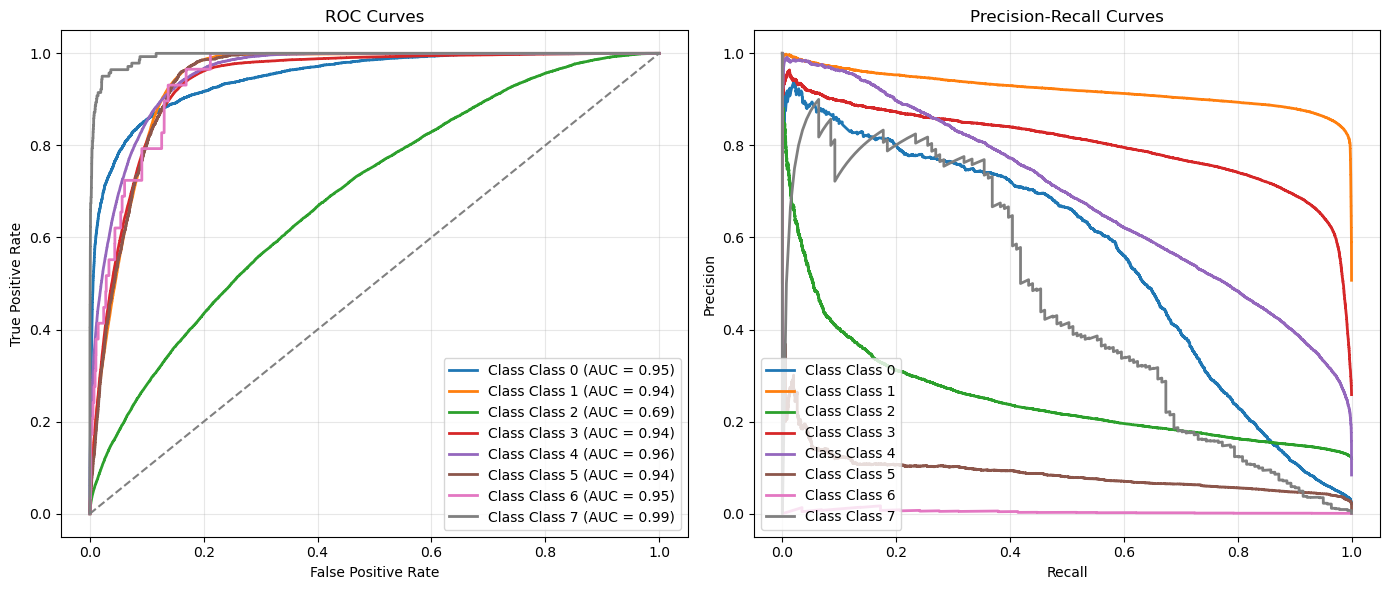

In [169]:
analyze_model_performance(
    y_val_multi, 
    y_pred_voting, 
    y_prob_voting, 
    class_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7'])

##### Impact of Class Imbalance on AUC:

- Classes such as 0, 5, 6, and 7 have very few samples compared to others. This imbalance may cause the model to prioritize accurate predictions for the majority class while "guessing" the rarer classes. As a result, the AUC (Area Under the Curve) values can be misleadingly high, not accurately reflecting the model's true performance. The high AUC for these classes is often due to a lack of sufficient negative examples in the dataset, which reduces false positives and exaggerates the model's ability to separate classes.
- Also, Class 2 exhibits the lowest AUC at 0.69.

##### Precision-Recall Analysis

- Precision-recall curves are particularly sensitive to class imbalance. If precision remains high across all recall levels for minority classes, it serves as a stronger indicator of genuine model performance.
In this case, Classes 0 and 7 demonstrate moderate performance, maintaining relatively good precision as recall increases. However, Classes 5 and 6 exhibit poor performance, with precision dropping sharply. Class 6 consistently has a precision of zero, as the model is unable to predict any instances of this class.

#### Using Age Category

In [172]:
features_age = [col for col in features + ['Age Cluster'] if col != 'Age at Injury']

In [173]:
# Preprocess data for modeling

train_modelling_age = encode_and_scale(train_modelling_scale, train_modelling_scale)
val_modelling_age = encode_and_scale(train_modelling_scale, val_modelling_to_scale)
test_modelling_age = encode_and_scale(train_modelling_scale, test_modelling_to_scale)

train_modelling_age = reduce_memory_usage(train_modelling_age, columns_to_scale)
val_modelling_age = reduce_memory_usage(val_modelling_age, columns_to_scale)
test_modelling_age = reduce_memory_usage(test_modelling_age, columns_to_scale)

# Corrected code for column selection
train_modelling_age = train_modelling_age[features_age]
val_modelling_age = val_modelling_age[features_age]
test_modelling_age = test_modelling_age[features_age]

# Aplicar nos dados
train_modelling_age = normalize_column_names(train_modelling_age)
val_modelling_age = normalize_column_names(val_modelling_age)
test_modelling_age = normalize_column_names(test_modelling_age)

Memory usage of dataframe is 229.92 MB
Memory usage after optimization is: 119.56 MB
Decreased by 48.0%
Memory usage of dataframe is 98.54 MB
Memory usage after optimization is: 51.24 MB
Decreased by 48.0%
Memory usage of dataframe is 222.00 MB
Memory usage after optimization is: 115.44 MB
Decreased by 48.0%


>It does no improve, so we can leave it as is.

#### Adding Agreement Reached

During the EDA, we saw that the Agreement Reached	variable is higly correlayed with the target: 4. TEMPORARY
so, adding our prediction from the binary prediction can help tp improve the final result: 

In [177]:
features_agreement = features + ['Agreement Reached']

In [178]:
train_modelling_agreement = encode_and_scale(train_modelling_scale, train_modelling_scale)
val_modelling_agreement = encode_and_scale(train_modelling_scale, val_modelling_to_scale)
test_modelling_agreement = encode_and_scale(train_modelling_scale, test_modelling_to_scale)

train_modelling_agreement = reduce_memory_usage(train_modelling_agreement, columns_to_scale)
val_modelling_agreement = reduce_memory_usage(val_modelling_agreement, columns_to_scale)
test_modelling_agreement = reduce_memory_usage(test_modelling_agreement, columns_to_scale)

train_modelling_agreement['Agreement Reached'] = X_agreement.loc[train_modelling_agreement.index, 'Agreement Reached']
val_modelling_agreement['Agreement Reached'] = X_agreement.loc[val_modelling_agreement.index, 'Agreement Reached']

# Corrected code for column selection
train_modelling_agreement = train_modelling_agreement[features_agreement]
val_modelling_agreement = val_modelling_agreement[features_agreement]

# Aplicar nos dados
train_modelling_agreement = normalize_column_names(train_modelling_agreement)
val_modelling_agreement = normalize_column_names(val_modelling_agreement)

Memory usage of dataframe is 229.92 MB
Memory usage after optimization is: 119.56 MB
Decreased by 48.0%
Memory usage of dataframe is 98.54 MB
Memory usage after optimization is: 51.24 MB
Decreased by 48.0%
Memory usage of dataframe is 222.00 MB
Memory usage after optimization is: 115.44 MB
Decreased by 48.0%


In [179]:
voting_agreement = VotingClassifier(
    estimators=[
        ('Random Forest', random_forest),
        ('LGBM', lgbm)],
    voting='soft', 
    weights=[2, 1])

voting_agreement.fit(train_modelling_agreement, y_train_multi)

y_pred_voting_agreement = voting_agreement.predict(val_modelling_agreement)
y_prob_voting_agreement = voting_agreement.predict_proba(val_modelling_agreement)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be

In [180]:
print("\nClassification Report:\n", classification_report(y_val_multi, y_pred_voting_agreement))


Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.62      0.58      3743
           1       0.87      0.95      0.91     87324
           2       0.43      0.14      0.21     20672
           3       0.78      0.81      0.79     44552
           4       0.59      0.70      0.64     14484
           5       0.11      0.21      0.14      1263
           6       0.00      0.00      0.00        29
           7       0.57      0.46      0.51       141

    accuracy                           0.78    172208
   macro avg       0.49      0.49      0.47    172208
weighted avg       0.76      0.78      0.76    172208



> So, agreement Reached does improve the f1 score, so we can use our prediction from the binary classification to try to predict each class. BUT since our binary prediction suffers from its own issues related to class imbalance, we will submit the Normal Voting model as our final submission.

#### Final Submission:

In [183]:
# final predictions
pred_voting_test = voting.predict(test_modelling)
pred_voting_test_list = pred_voting_test.tolist()
pred_voting_test_list = [
    '1. CANCELLED' if x == 0 else '2. NON-COMP' if x == 1 else '3. MED ONLY' if x == 2
    else '4. TEMPORARY' if x == 3 else '5. PPD SCH LOSS' if x == 4 else '6. PPD NSL' if x == 5
    else '7. PTD' if x == 6 else '8. DEATH' if x == 7 else x
    for x in pred_voting_test_list]

submission_voting = pd.read_csv("sample_submission.csv", index_col='Claim Identifier')
submission_voting["Claim Injury Type"] = pred_voting_test_list
submission_voting.to_csv('submissionvoting_pred.csv')
print("Submission file created as 'submissionvoting_pred.csv'")

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Submission file created as 'submissionvoting_pred.csv'
